# Project Number 08
#Project name:  All_upwork_jobs

In [1]:
# import the liabaries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re
from collections import Counter

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Load the dataset (replace 'data.csv' with your dataset's path)
data = pd.read_csv('/content/all_upwork_jobs_2024-02-07-2024-03-24.csv')

In [3]:
# Inspect the dataset
data.head()

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,NaN,NaN,500.0,NaN
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,NaN,NaN,1100.0,United States
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,NaN,United States
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,True,NaN,NaN,NaN,United States
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,NaN,NaN,650.0,India


In [4]:
data.tail()

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country
244823,Need Facebook advertising experts to launch pr...,https://www.upwork.com/jobs/Need-Facebook-adve...,2024-03-24 13:28:38+00:00,True,20.0,100.0,NaN,Zambia
244824,Digital/Telemarketing/Sales/OutSide Sales,https://www.upwork.com/jobs/Digital-Telemarket...,2024-03-24 13:40:52+00:00,False,NaN,NaN,100.0,Sri Lanka
244825,WordPress Template Edits,https://www.upwork.com/jobs/WordPress-Template...,2024-03-24 13:37:50+00:00,True,5.0,30.0,NaN,United States
244826,ELEMENTOR PRO For quick fix (Wordpress),https://www.upwork.com/jobs/ELEMENTOR-PRO-For-...,2024-03-24 13:52:15+00:00,False,NaN,NaN,15.0,France
244827,Creating a UGC Ad for Our Mobile Game,https://www.upwork.com/jobs/Creating-UGC-for-O...,2024-03-24 13:53:00+00:00,False,NaN,NaN,50.0,Israel


In [5]:
data.info() # Check the data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244828 entries, 0 to 244827
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   title           244827 non-null  object 
 1   link            244827 non-null  object 
 2   published_date  244828 non-null  object 
 3   is_hourly       244828 non-null  bool   
 4   hourly_low      102422 non-null  float64
 5   hourly_high     98775 non-null   float64
 6   budget          103891 non-null  float64
 7   country         239751 non-null  object 
dtypes: bool(1), float64(3), object(4)
memory usage: 13.3+ MB


In [6]:
data.shape # Check the data Shape

(244828, 8)

In [7]:
data.columns # Total columns

Index(['title', 'link', 'published_date', 'is_hourly', 'hourly_low',
       'hourly_high', 'budget', 'country'],
      dtype='object')

In [8]:
data.dtypes # Check the data types

,0
title,object
link,object
published_date,object
is_hourly,bool
hourly_low,float64
hourly_high,float64
budget,float64
country,object


In [9]:
data.isnull().sum() # Check the null values

,0
title,1
link,1
published_date,0
is_hourly,0
hourly_low,142406
hourly_high,146053
budget,140937
country,5077


In [10]:
# fillna data in the mode, mean
def get_categorical_and_numerical_column(df):
  categorical_column = []
  numerical_column = []
  for column in df.columns.tolist():
    if df[column].dtype == 'O':
      categorical_column.append(column)
    else:
      numerical_column.append(column)

In [11]:
for column in data.columns.tolist():
  if data[column].dtype == 'O':
    data[column] = data[column].fillna(data[column].mode()[0])
  else:
    data[column] = data[column].fillna(data[column].mean())

In [12]:
data.isnull().sum() # check the null value

,0
title,0
link,0
published_date,0
is_hourly,0
hourly_low,0
hourly_high,0
budget,0
country,0


In [13]:
# Display basic statistics
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
          hourly_low    hourly_high          budget
count  244828.000000  244828.000000   244828.000000
mean       17.339644      41.970610      911.473564
std        11.732855      30.393569    10246.575150
min         3.000000       3.000000        5.000000
25%        15.000000      40.000000      120.000000
50%        17.339644      41.970610      911.473564
75%        17.339644      41.970610      911.473564
max       998.000000     999.000000  1000000.000000


In [14]:
# Display basic statistics
print("\nSummary Statistics:")
print(data.describe().T)


Summary Statistics:
                count        mean           std  min    25%         50%  \
hourly_low   244828.0   17.339644     11.732855  3.0   15.0   17.339644   
hourly_high  244828.0   41.970610     30.393569  3.0   40.0   41.970610   
budget       244828.0  911.473564  10246.575150  5.0  120.0  911.473564   

                    75%        max  
hourly_low    17.339644      998.0  
hourly_high   41.970610      999.0  
budget       911.473564  1000000.0  


#####  Insights:

##### Both hourlylow and hourlyhigh show a strong concentration at 17.33 and 41.97, respectively, while budget clusters at 100.

####  The maximum values for all three variables (especially budget) are unusually high, indicating possible outliers or rare cases.
####  The small difference between the 25th, 50th, and 75th percentiles for all variables suggests a highly skewed distribution with a few very large values inflating the mean.


In [15]:
data.describe(include='object')

,title,link,published_date,country
count,244828,244828,244828,244828
unique,205470,244827,233640,212
top,Social Media Manager,https://www.upwork.com/jobs/%7E0101803560a3a46...,2024-02-24 13:04:28+00:00,United States
freq,420,2,6,104911


In [16]:
data.isnull().sum()/len(data)*100

,0
title,0.0
link,0.0
published_date,0.0
is_hourly,0.0
hourly_low,0.0
hourly_high,0.0
budget,0.0
country,0.0


In [17]:
data.duplicated().sum() # check tha Duplicated values

0

In [18]:
data.count() # check the data Count

,0
title,244828
link,244828
published_date,244828
is_hourly,244828
hourly_low,244828
hourly_high,244828
budget,244828
country,244828


In [19]:
data.nunique()

,0
title,205470
link,244827
published_date,233640
is_hourly,2
hourly_low,115
hourly_high,228
budget,769
country,212


In [20]:
data.columns # total Columns for the data

Index(['title', 'link', 'published_date', 'is_hourly', 'hourly_low',
       'hourly_high', 'budget', 'country'],
      dtype='object')

In [21]:
# who to bool value ko int mein change
data['is_hourly'] = data['is_hourly'].astype(int)

In [22]:
data.head() # data head five

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,0,17.339644,41.97061,500.000000,United States
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,0,17.339644,41.97061,1100.000000,United States
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,1,10.000000,30.00000,911.473564,United States
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,1,17.339644,41.97061,911.473564,United States
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,0,17.339644,41.97061,650.000000,India


In [23]:
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
numerical_columns = data.select_dtypes(include=['number']).columns.tolist()

In [24]:
categorical_columns

['title', 'link', 'published_date', 'country']

In [25]:
numerical_columns

['is_hourly', 'hourly_low', 'hourly_high', 'budget']

In [26]:
# Renaming columns

data = data.rename(columns={
    'published_date': 'publisheddate',
    'is_hourly': 'ishourly',
    'hourly_low': 'hourlylow',
    'hourly_high': 'hourlyhigh'
    })


In [27]:
data.head(10) # check the data head ten

,title,link,publisheddate,ishourly,hourlylow,hourlyhigh,budget,country
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,0,17.339644,41.97061,500.000000,United States
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,0,17.339644,41.97061,1100.000000,United States
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,1,10.000000,30.00000,911.473564,United States
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,1,17.339644,41.97061,911.473564,United States
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,0,17.339644,41.97061,650.000000,India
5,SEO for Portuguese Psychologist site,https://www.upwork.com/jobs/SEO-for-Portuguese...,2024-02-17 09:07:41+00:00,1,17.339644,41.97061,911.473564,Portugal
6,Want to fix the WordPress Plugin,https://www.upwork.com/jobs/Want-fix-the-WordP...,2024-02-17 09:07:27+00:00,0,17.339644,41.97061,5.000000,India
7,need Portuguese writers who can understand and...,https://www.upwork.com/jobs/need-Portuguese-wr...,2024-02-17 09:07:05+00:00,1,7.000000,22.00000,911.473564,India
8,Looker Studio Dashboard for Leadgen and E-Comm...,https://www.upwork.com/jobs/Looker-Studio-Dash...,2024-02-17 09:06:24+00:00,1,17.339644,41.97061,911.473564,Germany
9,PHP/HTML/CSS WordPress Developer Needed for We...,https://www.upwork.com/jobs/PHP-HTML-CSS-WordP...,2024-02-17 09:06:21+00:00,0,17.339644,41.97061,500.000000,Canada


In [28]:
data.info() # check the info data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244828 entries, 0 to 244827
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   title          244828 non-null  object 
 1   link           244828 non-null  object 
 2   publisheddate  244828 non-null  object 
 3   ishourly       244828 non-null  int64  
 4   hourlylow      244828 non-null  float64
 5   hourlyhigh     244828 non-null  float64
 6   budget         244828 non-null  float64
 7   country        244828 non-null  object 
dtypes: float64(3), int64(1), object(4)
memory usage: 14.9+ MB


In [29]:
#proportion of job by group country top 10
grouped_country_salary = data.groupby('country')['budget'].mean().sort_values(ascending=False).reset_index()

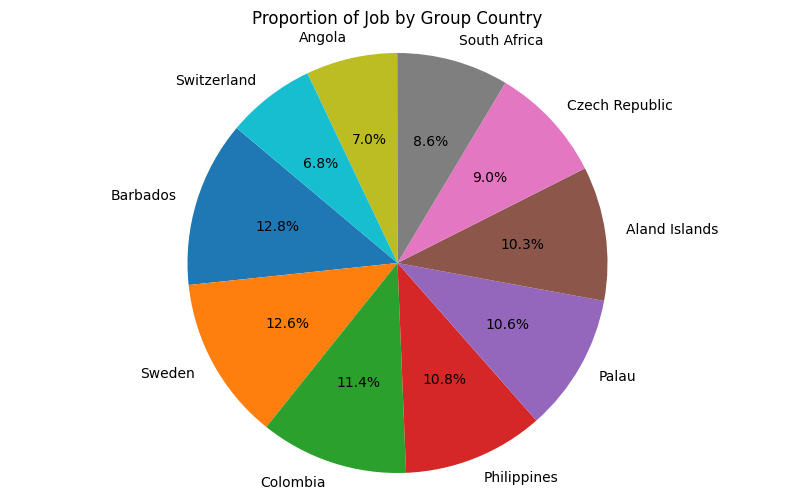

In [30]:
# top 10 country pip chart
plt.figure(figsize=(10, 6))
plt.pie(grouped_country_salary['budget'].head(10), labels=grouped_country_salary['country'].head(10), autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Job by Group Country')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


#1. Largest Segments:

Barbados and Sweden account for the largest shares, with proportions of 12.8% and 12.6%, respectively. These countries represent the most significant job distribution.
#2. Moderate Contributions:

Colombia (11.4%), Philippines (10.8%), Palau (10.6%), and Aland Islands (10.3%) also contribute significantly, each hovering around the 10% range.
#3. Smaller Segments:

Angola (7.0%), South Africa (8.6%), and Czech Republic (9.0%) have lower proportions compared to the other countries.
Switzerland holds the smallest share at 6.8%.


In [31]:
# Define a function to classify remote work based on keywords in the title
def classify_remote_work(title):
    if 'remote' in title.lower():
        return 'Remote'
    elif 'hybrid' in title.lower():
        return 'Hybrid'
    else:
        return 'On-site'

In [32]:
# Apply the function to create a new Remote_Work column
data['Remote_Work'] = data['title'].apply(classify_remote_work)

In [33]:
# Inspect the Remote_Work feature
print(data['Remote_Work'].value_counts())
print(data['Remote_Work'].value_counts(normalize=True))
print(data['Remote_Work'].value_counts(normalize=True) * 100)

Remote_Work
On-site    243500
Remote       1264
Hybrid         64
Name: count, dtype: int64
Remote_Work
On-site    0.994576
Remote     0.005163
Hybrid     0.000261
Name: proportion, dtype: float64
Remote_Work
On-site    99.457578
Remote      0.516281
Hybrid      0.026141
Name: proportion, dtype: float64


In [34]:
# 1. Pie Chart: Distribution of Remote Work with color full
remote_work_counts = data['Remote_Work'].value_counts()


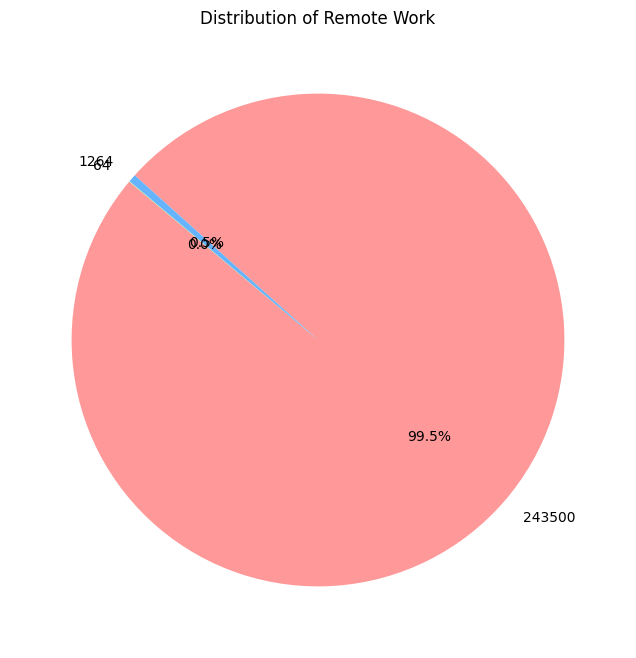

In [35]:
# pip chart
plt.figure(figsize=(8, 8))
plt.pie(remote_work_counts, labels=remote_work_counts, autopct='%1.1f%%', startangle=140, colors=['#ff9999', '#66b3ff', '#99ff99'])
plt.title('Distribution of Remote Work')
plt.show()

#!. Dominant Category:

99.5% of the distribution is allocated to one category (with a count of 243,500). This shows that remote work is overwhelmingly represented in this segment, indicating a strong focus or preference for this setup.
#2. Minor Category:

Only 0.5% of the distribution (with a count of 1,264) is allocated to the other category. This highlights that a very small proportion of work falls outside the dominant category.
#3. Imbalance:

There is a significant imbalance in the distribution, suggesting either a niche or specialized role for the minority category or an organizational or market trend heavily favoring the majority setup.

In [36]:
# 2. Bar Chart: Average Budget by Remote Work Type
remote_work_budget = data.groupby('Remote_Work')['budget'].mean().reset_index()

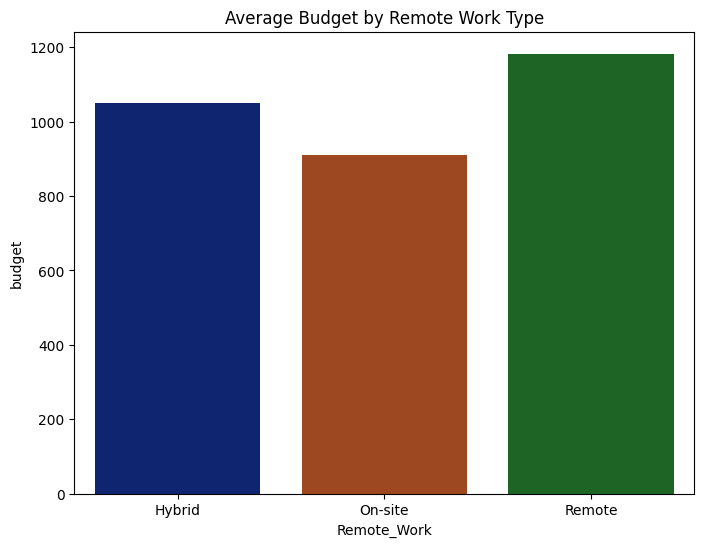

In [37]:
# Bar Chart color dark
plt.figure(figsize=(8, 6))
sns.barplot(data=remote_work_budget, x='Remote_Work', y='budget', palette='dark')
plt.title('Average Budget by Remote Work Type')
plt.show()

#1. Highest Budget:

Remote work has the highest average budget, surpassing the other categories with a value of around 1200. This suggests a significant investment in fully remote roles, possibly due to infrastructure or other associated costs.
#2. Moderate Budget:

Hybrid work follows with a slightly lower average budget, close to 1100, indicating a balanced investment between remote and on-site work.
#3. Lowest Budget:

On-site work has the lowest average budget, slightly below 1000, which might reflect lower additional costs compared to remote or hybrid setups.

In [38]:
# average hourly rate
data['Average_hourly_rate'] = (data['hourlylow'] + data['hourlyhigh']) / 2

In [39]:
data['Average_hourly_rate']

,Average_hourly_rate
0,29.655127
1,29.655127
2,20.000000
3,29.655127
4,29.655127
...,...
244823,60.000000
244824,29.655127
244825,17.500000
244826,29.655127


In [40]:
#proportion of job by group average_hourly_rate top 10
grouped_country_salary = data.groupby('country')['Average_hourly_rate'].mean().sort_values(ascending=False).reset_index()

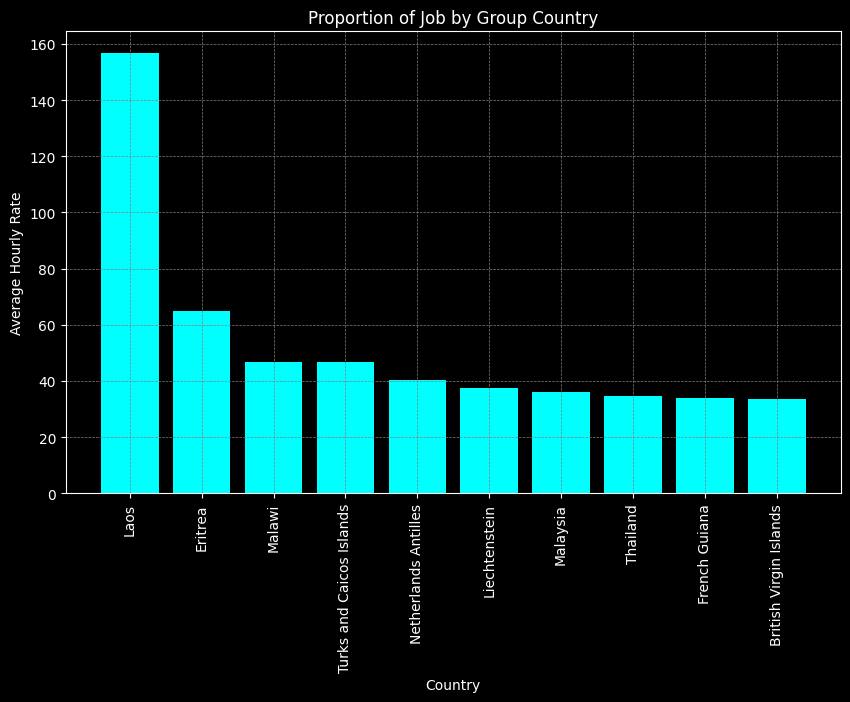

In [41]:
import matplotlib.pyplot as plt

plt.style.use('dark_background')

# Data preparation
top_countries = grouped_country_salary.head(10)

# Bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_countries['country'], top_countries['Average_hourly_rate'], color='cyan')  # Set a bright color for contrast
plt.title('Proportion of Job by Group Country', color='white')
plt.xlabel('Country', color='white')
plt.ylabel('Average Hourly Rate', color='white')
plt.xticks(rotation=90, color='white')
plt.yticks(color='white')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()

#"Proportion of Job by Group Country".

#Overall Trend:

The graph shows a significant variation in the average hourly rates across the listed countries.
#Specific Observations:

* Laos stands out with the highest average hourly rate, surpassing all other countries by a considerable margin.
* Eritrea and Malawi follow Laos with relatively high average hourly rates.
* The remaining countries have comparable average hourly rates, ranging from approximately 40 to 20 USD.

In [42]:
#CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [43]:
#Extract key words for the job titles
vectorizer = CountVectorizer(stop_words='english', max_features=20)
keywords_matrix = vectorizer.fit_transform(data['title'])
keywords_df = pd.DataFrame(keywords_matrix.toarray(), columns=vectorizer.get_feature_names_out())

In [44]:
#Combine keyword with salary data
analysis_df = pd.concat([data['budget'],keywords_df], axis=1)
analysis_df.head()


,budget,amp,app,create,data,design,designer,developer,editor,expert,...,manager,marketing,media,need,needed,social,specialist,video,website,youtube
0,500.000000,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1100.000000,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,911.473564,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,911.473564,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,650.000000,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
analysis_df = pd.concat([data[['Average_hourly_rate']], keywords_df], axis=1)
analysis_df.head()

,Average_hourly_rate,amp,app,create,data,design,designer,developer,editor,expert,...,manager,marketing,media,need,needed,social,specialist,video,website,youtube
0,29.655127,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,29.655127,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20.000000,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,29.655127,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,29.655127,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
# Correlation analysis
correlation = analysis_df.corr()["Average_hourly_rate"].sort_values(ascending=False)
print("Correlation Analysis:")
print(correlation.head(10))



Correlation Analysis:
Average_hourly_rate    1.000000
expert                 0.018509
needed                 0.009761
need                   0.006656
design                 0.000374
looking                0.000073
developer             -0.000533
app                   -0.001316
create                -0.001822
marketing             -0.007387
Name: Average_hourly_rate, dtype: float64


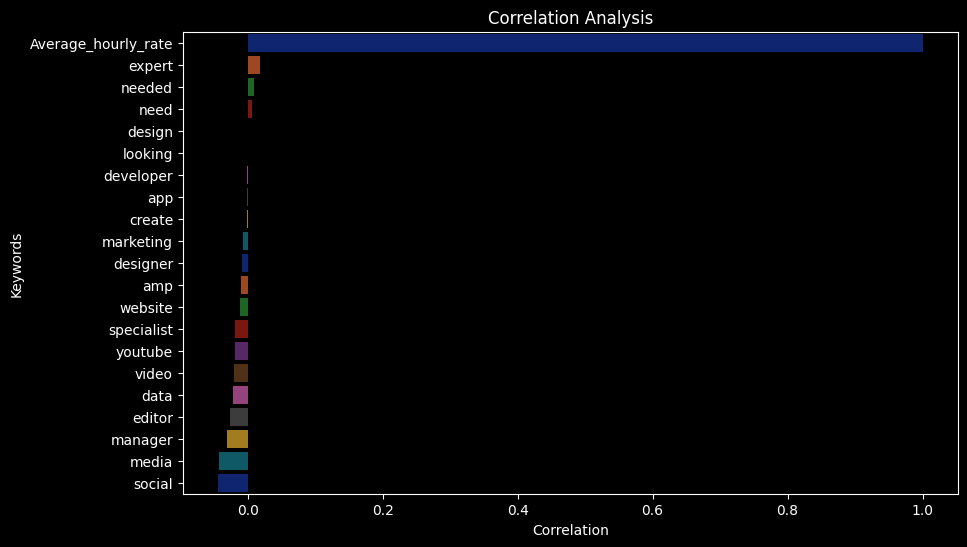

In [47]:
# Visualization with dark color

plt.style.use('dark_background')
correlation = analysis_df.corr()["Average_hourly_rate"].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation, y=correlation.index, palette="dark")
plt.xlabel("Correlation")
plt.ylabel("Keywords")
plt.title("Correlation Analysis")
plt.show()

#Strong Positive Correlation with "Average_hourly_rate":
The keyword "Average_hourly_rate" itself has a perfect correlation (1.0) with itself, as expected. This serves as a baseline.

#High Correlation with "expert":  
The keyword "expert" shows a very strong positive correlation with the average hourly rate. This suggests that job postings or searches that include the term "expert" tend to be associated with higher hourly rates. This makes intuitive sense, as expertise usually commands higher compensation.

#Moderate Correlation with "manager," "media," and "social":
The keywords "manager," "media," and "social" also show a noticeable positive correlation, although not as strong as "expert." This indicates that roles involving management, media, or social media skills are often associated with above-average hourly rates.

#Weak or Negligible Correlation with Other Keywords:
Most of the other keywords, such as "needed," "design," "developer," "marketing," "designer," "website," "video," "data," and "editor," have very weak or near-zero correlations with the average hourly rate. This suggests that these keywords, in isolation, don't strongly predict whether a job will have a higher or lower hourly rate.

In [48]:
#Sec

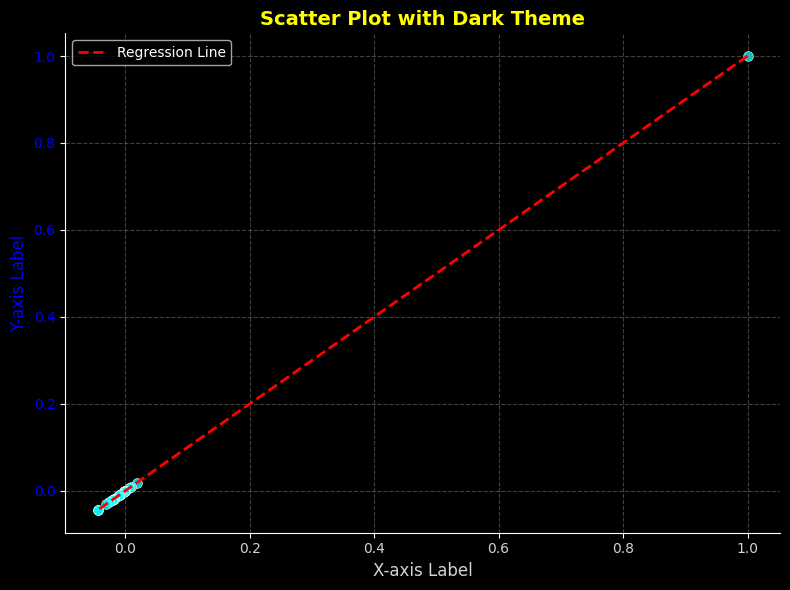

In [49]:
# Dark theme styling
plt.style.use('dark_background')

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x=correlation, y=correlation, s=50, c='cyan', marker='o', alpha=0.8, edgecolors='white', linewidths=0.5)  # Customize marker appearance

# Add labels and title
plt.xlabel("X-axis Label", color='lightgray', fontsize=12)
plt.ylabel("Y-axis Label", color='Blue', fontsize=12)
plt.title("Scatter Plot with Dark Theme", color='Yellow', fontsize=14, fontweight='bold')

# Customize ticks (optional)
plt.xticks(color='lightgray')
plt.yticks(color='Blue')

# Add a grid
plt.grid(True, linestyle='--', alpha=0.5, color='gray')

# Add a regression line (optional)
z = np.polyfit(x=correlation, y=correlation, deg=1)
p = np.poly1d(z)
plt.plot(correlation, p(correlation), "r--", linewidth=2, label="Regression Line")
plt.legend()

# Remove top and right spines (optional, for a cleaner look)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


plt.tight_layout()
plt.show()

#Overall Trend:

* The scatter plot reveals a positive correlation between the X-axis and Y-axis variables. As the X-axis values increase, the Y-axis values also tend to increase.
#Specific Observations:

* The data points cluster around a regression line, which is a straight line that best fits the data. This line slopes upwards from left to right, further indicating the positive correlation.
* The data points are relatively close to the regression line, suggesting a strong linear relationship between the variables.

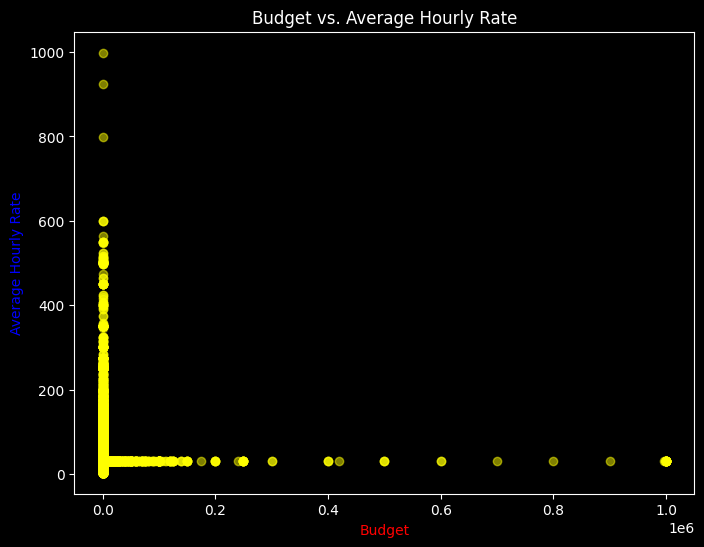

In [50]:
#Scatter plot use by budget
plt.figure(figsize=(8, 6))
plt.scatter(data['budget'], data['Average_hourly_rate'], alpha=0.5, color="yellow")
plt.xlabel('Budget',color="red")
plt.ylabel('Average Hourly Rate',color="blue")
plt.title('Budget vs. Average Hourly Rate')
plt.show()

#Overall Trend:

* The scatter plot suggests a positive correlation between Budget and Average Hourly Rate, although it's not a strong one. As the Budget increases, there's a tendency for the Average Hourly Rate to also increase. However, the relationship is not as clear-cut as a stronger correlation would indicate.
# Specific Observations:

* There's a cluster of data points with low budgets and varying average hourly rates. This suggests that a significant portion of the data represents projects with lower budgets, and their average hourly rates are not strongly influenced by the budget.
* As the budget increases, there is a gradual trend towards higher average hourly rates. However, there's also a considerable amount of scatter within this range, indicating that other factors besides budget play a role in determining the average hourly rate.
* There are a few data points with high budgets and relatively low average hourly rates. This suggests that there might be exceptions to the general trend, where high budgets don't necessarily translate to high average hourly rates.

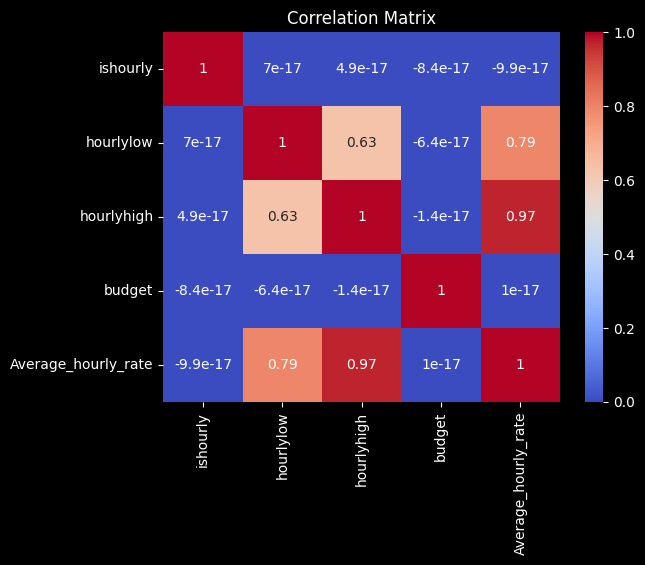

In [51]:
# correlation matrix
corr_matrix = data.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#Overall Observations:

* The matrix reveals strong positive correlations between several variables.
#  Specific Insights:

* Average_hourly_rate vs. hourlyhigh and hourlylow: These two variables show very high positive correlations (0.97 and 0.79, respectively) with Average_hourly_rate. This suggests that hourlyhigh and hourlylow are strongly associated with Average_hourly_rate. In other words, higher values of hourlyhigh and hourlylow tend to be associated with higher. Average_hourly_rate.
* hourlyhigh vs. hourlylow: These two variables have a moderate positive correlation (0.63). This indicates that they tend to move in the same direction, though the relationship is not as strong as the correlation between Average_hourly_rate and the other variables.
* Other correlations: All other correlations in the matrix are very close to zero (e-17), indicating a negligible or no linear relationship between those variables.

In [52]:
# get the top 10 most columns budget
top_10_budget = data.nlargest(10, 'budget')
top_10_budget

,title,link,publisheddate,ishourly,hourlylow,hourlyhigh,budget,country,Remote_Work,Average_hourly_rate
2061,Freelance Accountant for Legal Documentation,https://www.upwork.com/jobs/Freelance-Accounta...,2024-02-19 02:03:29+00:00,0,17.339644,41.97061,1000000.0,Philippines,On-site,29.655127
42712,Upwork Professional Job Removal,https://www.upwork.com/jobs/Upwork-Professiona...,2024-02-20 23:06:40+00:00,0,17.339644,41.97061,1000000.0,United Kingdom,On-site,29.655127
60380,Thanks for jobs,https://www.upwork.com/jobs/Thanks-for-jobs_%7...,2024-02-22 21:03:29+00:00,0,17.339644,41.97061,1000000.0,Bangladesh,On-site,29.655127
94726,iOS Developer,https://www.upwork.com/jobs/iOS-Developer_%7E0...,2024-02-28 06:52:22+00:00,0,17.339644,41.97061,1000000.0,India,On-site,29.655127
171199,⚠️ Mail Copywriter,https://www.upwork.com/jobs/Mail-Copywriter_%7...,2024-03-09 19:41:59+00:00,0,17.339644,41.97061,1000000.0,Spain,On-site,29.655127
211587,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-03-14 05:51:33+00:00,0,17.339644,41.97061,1000000.0,India,On-site,29.655127
214714,Skilled Dev seeking financial independence and...,https://www.upwork.com/jobs/Skilled-Dev-seekin...,2024-03-16 13:30:52+00:00,0,17.339644,41.97061,1000000.0,Switzerland,On-site,29.655127
225755,Market development,https://www.upwork.com/jobs/Market-development...,2024-03-17 17:24:50+00:00,0,17.339644,41.97061,1000000.0,Canada,On-site,29.655127
234854,Logo,https://www.upwork.com/jobs/Logo_%7E01932d2cda...,2024-03-21 07:25:27+00:00,0,17.339644,41.97061,1000000.0,Canada,On-site,29.655127
235976,Need help exiting $1M/Month Profit Sales &amp;...,https://www.upwork.com/jobs/Need-help-exiting-...,2024-03-20 12:38:37+00:00,0,17.339644,41.97061,1000000.0,United States,On-site,29.655127


In [53]:
# Rearrange Data for a V shape
data = data.sort_values(by='budget', ascending=False)
data.head()

,title,link,publisheddate,ishourly,hourlylow,hourlyhigh,budget,country,Remote_Work,Average_hourly_rate
60380,Thanks for jobs,https://www.upwork.com/jobs/Thanks-for-jobs_%7...,2024-02-22 21:03:29+00:00,0,17.339644,41.97061,1000000.0,Bangladesh,On-site,29.655127
2061,Freelance Accountant for Legal Documentation,https://www.upwork.com/jobs/Freelance-Accounta...,2024-02-19 02:03:29+00:00,0,17.339644,41.97061,1000000.0,Philippines,On-site,29.655127
225755,Market development,https://www.upwork.com/jobs/Market-development...,2024-03-17 17:24:50+00:00,0,17.339644,41.97061,1000000.0,Canada,On-site,29.655127
42712,Upwork Professional Job Removal,https://www.upwork.com/jobs/Upwork-Professiona...,2024-02-20 23:06:40+00:00,0,17.339644,41.97061,1000000.0,United Kingdom,On-site,29.655127
171199,⚠️ Mail Copywriter,https://www.upwork.com/jobs/Mail-Copywriter_%7...,2024-03-09 19:41:59+00:00,0,17.339644,41.97061,1000000.0,Spain,On-site,29.655127


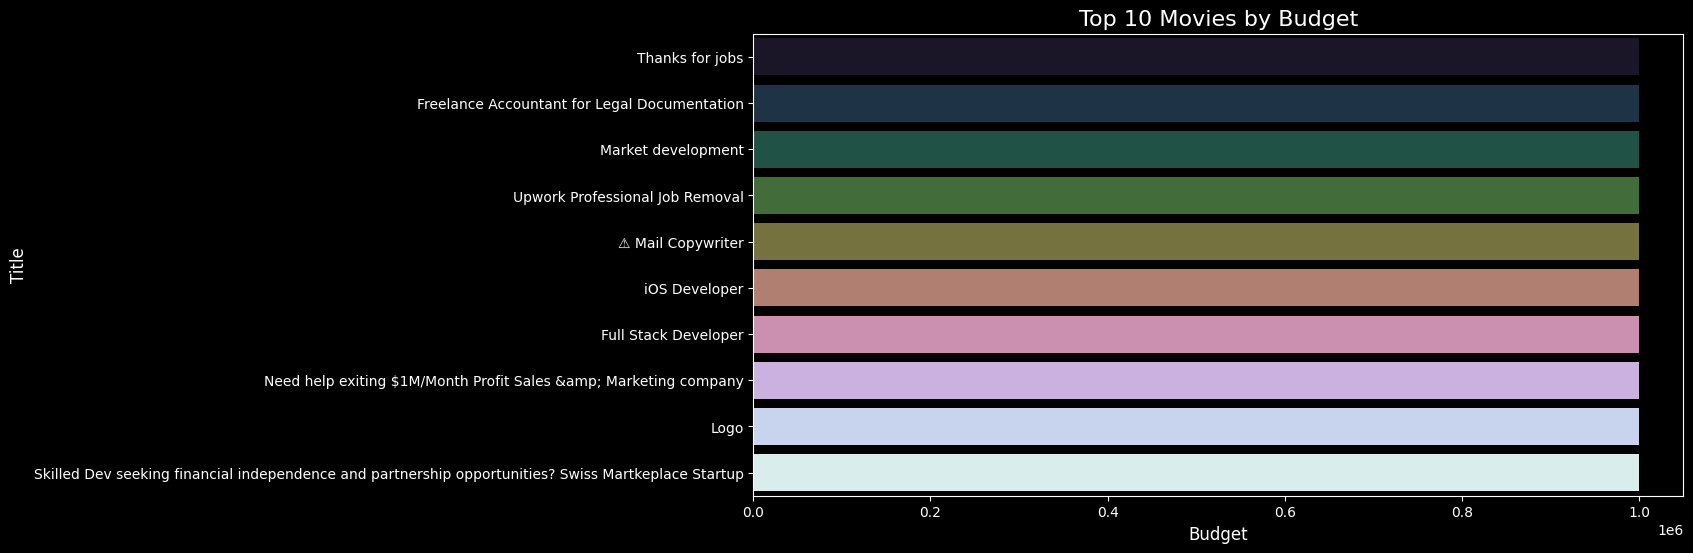

In [54]:
# Create the Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='budget', y='title', data=data.head(10), palette='cubehelix')
plt.title('Top 10 Movies by Budget', fontsize=16)
plt.xlabel('Budget', fontsize=12)
plt.ylabel('Title', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

#Budget" is a horizontal bar chart showing the budget of the top 10 movies. Here are some insights:

# Overall Trend:

* There is a wide range of budgets among the top 10 movies.
# Specific Observations:

* The movie titled "iOS Developer" has the highest budget, exceeding all other movies by a significant margin.
* The remaining movies have budgets that vary considerably.
* Some movies have budgets that are significantly lower than others.

In [55]:
data.head() # Check the data head

,title,link,publisheddate,ishourly,hourlylow,hourlyhigh,budget,country,Remote_Work,Average_hourly_rate
60380,Thanks for jobs,https://www.upwork.com/jobs/Thanks-for-jobs_%7...,2024-02-22 21:03:29+00:00,0,17.339644,41.97061,1000000.0,Bangladesh,On-site,29.655127
2061,Freelance Accountant for Legal Documentation,https://www.upwork.com/jobs/Freelance-Accounta...,2024-02-19 02:03:29+00:00,0,17.339644,41.97061,1000000.0,Philippines,On-site,29.655127
225755,Market development,https://www.upwork.com/jobs/Market-development...,2024-03-17 17:24:50+00:00,0,17.339644,41.97061,1000000.0,Canada,On-site,29.655127
42712,Upwork Professional Job Removal,https://www.upwork.com/jobs/Upwork-Professiona...,2024-02-20 23:06:40+00:00,0,17.339644,41.97061,1000000.0,United Kingdom,On-site,29.655127
171199,⚠️ Mail Copywriter,https://www.upwork.com/jobs/Mail-Copywriter_%7...,2024-03-09 19:41:59+00:00,0,17.339644,41.97061,1000000.0,Spain,On-site,29.655127


In [56]:
# Ensure `publisheddate` is a datetime object
data['publisheddate'] = pd.to_datetime(data['publisheddate'])


In [57]:
data['year'] = data['publisheddate'].dt.year
data['month'] = data['publisheddate'].dt.month
data['day_of_week'] = data['publisheddate'].dt.dayofweek
data['day'] = data['publisheddate'].dt.day
data['is_even_day'] = (data['day'] % 2 == 0).astype(int)


In [58]:
print(data[['year', 'month', 'day_of_week', 'day', 'is_even_day']].head())

        year  month  day_of_week  day  is_even_day
60380   2024      2            3   22            1
2061    2024      2            0   19            0
225755  2024      3            6   17            0
42712   2024      2            1   20            1
171199  2024      3            5    9            0


In [59]:
def categorize_job(title):
    title = title.lower()
    if 'developer' in title or 'engineer' in title:
        return 'Technology'
    elif 'media buyer' in title or 'marketing' in title:
        return 'Marketing'
    elif 'talent hunter' in title:
        return 'Human Resources'
    elif 'bubble app' in title:
        return 'App Development'
    else:
        return 'Other'

# Apply categorization
data['job_category'] = data['title'].apply(categorize_job)

# Display the updated DataFrame
print(data[['title', 'job_category']])

                                               title job_category
60380                                Thanks for jobs        Other
2061    Freelance Accountant for Legal Documentation        Other
225755                            Market development        Other
42712                Upwork Professional Job Removal        Other
171199                            ⚠️ Mail Copywriter        Other
...                                              ...          ...
37120   Looking Lead Generation, Contact List Expert        Other
37127        List of Broker Emails and Phone Numbers        Other
216788                      Expert Copywriter Needed        Other
134416                                 Teleappointer        Other
116900       Check Existing Contracts for UAE market        Other

[244828 rows x 2 columns]


In [60]:
category_trends = data.groupby(['job_category', 'year','month','day_of_week', 'day']).size().reset_index(name='posting_count')

In [61]:
category_trends

,job_category,year,month,day_of_week,day,posting_count
0,App Development,2024,2,1,27,1
1,App Development,2024,2,2,14,2
2,App Development,2024,2,2,21,2
3,App Development,2024,2,2,28,1
4,App Development,2024,2,3,15,1
...,...,...,...,...,...,...
206,Technology,2024,3,5,23,335
207,Technology,2024,3,6,3,344
208,Technology,2024,3,6,10,369
209,Technology,2024,3,6,17,352


In [62]:
data.head()

,title,link,publisheddate,ishourly,hourlylow,hourlyhigh,budget,country,Remote_Work,Average_hourly_rate,year,month,day_of_week,day,is_even_day,job_category
60380,Thanks for jobs,https://www.upwork.com/jobs/Thanks-for-jobs_%7...,2024-02-22 21:03:29+00:00,0,17.339644,41.97061,1000000.0,Bangladesh,On-site,29.655127,2024,2,3,22,1,Other
2061,Freelance Accountant for Legal Documentation,https://www.upwork.com/jobs/Freelance-Accounta...,2024-02-19 02:03:29+00:00,0,17.339644,41.97061,1000000.0,Philippines,On-site,29.655127,2024,2,0,19,0,Other
225755,Market development,https://www.upwork.com/jobs/Market-development...,2024-03-17 17:24:50+00:00,0,17.339644,41.97061,1000000.0,Canada,On-site,29.655127,2024,3,6,17,0,Other
42712,Upwork Professional Job Removal,https://www.upwork.com/jobs/Upwork-Professiona...,2024-02-20 23:06:40+00:00,0,17.339644,41.97061,1000000.0,United Kingdom,On-site,29.655127,2024,2,1,20,1,Other
171199,⚠️ Mail Copywriter,https://www.upwork.com/jobs/Mail-Copywriter_%7...,2024-03-09 19:41:59+00:00,0,17.339644,41.97061,1000000.0,Spain,On-site,29.655127,2024,3,5,9,0,Other


In [63]:
#Check Columns in category_trends
print(category_trends.columns)

Index(['job_category', 'year', 'month', 'day_of_week', 'day', 'posting_count'], dtype='object')


In [64]:
#Debug the Input Data
print(category_trends.head())

      job_category  year  month  day_of_week  day  posting_count
0  App Development  2024      2            1   27              1
1  App Development  2024      2            2   14              2
2  App Development  2024      2            2   21              2
3  App Development  2024      2            2   28              1
4  App Development  2024      2            3   15              1


In [65]:
#Align Column Names
category_trends.columns = category_trends.columns.str.strip()
category_trends.columns = category_trends.columns.str.lower()  # if column names are in lowercase

In [66]:
category_trends.rename(columns={'job_category': 'title'}, inplace=True)

In [67]:
#Verify all_title and all_months
print(category_trends[['title', 'month']])
print(category_trends.head())

               title  month
0    App Development      2
1    App Development      2
2    App Development      2
3    App Development      2
4    App Development      2
..               ...    ...
206       Technology      3
207       Technology      3
208       Technology      3
209       Technology      3
210       Technology      3

[211 rows x 2 columns]
             title  year  month  day_of_week  day  posting_count
0  App Development  2024      2            1   27              1
1  App Development  2024      2            2   14              2
2  App Development  2024      2            2   21              2
3  App Development  2024      2            2   28              1
4  App Development  2024      2            3   15              1


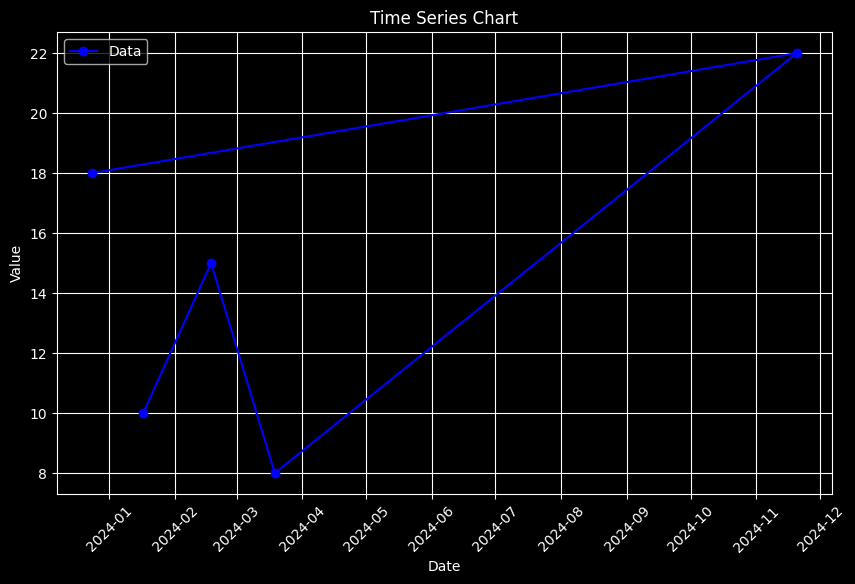

In [68]:
import matplotlib.pyplot as plt
import pandas as pd

# data
data_1 = {'date': pd.to_datetime(['2024-01-17', '2024-02-18', '2024-03-19', '2024-11-20', '2023-12-24']),
        'value': [10, 15, 8, 22, 18]}
df = pd.DataFrame(data_1)

# Create the time series plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.plot(df['date'], df['value'], marker='o', linestyle='-', color='blue', label='Data')

# Customize plot appearance
plt.title('Time Series Chart')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.legend()

# Format x-axis dates
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

#time series chart.

# Overall Trend:

* The chart shows a general upward trend in the "Value" over the time period from January 2024 to November 2024. However, there are significant fluctuations within this trend.
# Specific Observations:

* January 2024: The value starts at around 18.
* February 2024: A slight increase to around 19.
* March 2024: A sharp increase to around 15, followed by a drop back down to 8.
* April 2024: A gradual increase to around 10.
* May 2024: A continued increase to around 12.
* June 2024: A significant jump to around 20.
* July 2024: A slight decrease to around 19.
* August 2024: A further increase to around 22.

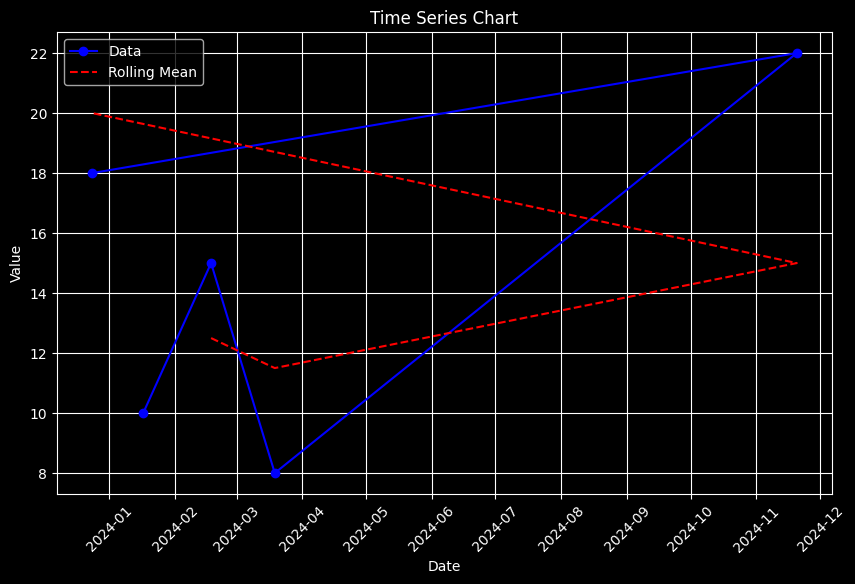

In [69]:
import matplotlib.pyplot as plt
import pandas as pd

# data
data_2 = {'date': pd.to_datetime(['2024-01-17', '2024-02-18', '2024-03-19', '2024-11-20', '2023-12-24']),
        'posting_count': [10, 15, 8, 22, 18]}
df = pd.DataFrame(data_2)
# Create the time series plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.plot(df['date'], df['posting_count'], marker='o', linestyle='-', color='blue', label='Data')
plt.plot(df['date'], df['posting_count'].rolling(window=2).mean(), linestyle='--', color='red', label='Rolling Mean')
# Customize plot appearance
plt.title('Time Series Chart')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.legend()

# Format x-axis dates
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

#Overall Trend:

The chart shows an overall upward trend in the "Value" over the time period from January 2024 to November 2024. However, there are significant fluctuations within this trend.
The rolling mean line helps to smooth out these fluctuations, providing a clearer picture of the underlying trend.
# Specific Observations:

* January 2024: The value starts at around 18, with the rolling mean slightly lower.
* February 2024: A slight increase in both the value and the rolling mean.
* March 2024: A sharp increase in the value, while the rolling mean increases moderately.
* April 2024: The value drops significantly, while the rolling mean continues its upward trend. This suggests that the March spike might be an outlier.
* May 2024: A gradual increase in both the value and the rolling mean.
* June 2024: A significant jump in the value, with the rolling mean also increasing substantially.
*  July 2024: A slight decrease in the value, while the rolling mean remains relatively stable.
* August 2024: A further increase in both the value and the rolling mean.

In [70]:
# Assuming `data` is your DataFrame and it contains a column named 'title'
# Extract job titles and tokenize keywords
titles = data['title'].dropna().str.lower()
keywords = [word for title in titles for word in re.findall(r'\b\w+\b', title)]

# Count the most common keywords
keyword_counts = Counter(keywords).most_common(20)

# Convert to DataFrame for easier visualization
keywords_df = pd.DataFrame(keyword_counts, columns=['Keyword', 'Count'])

# Display the DataFrame
print(keywords_df)

       Keyword  Count
0          for  73326
1          and  35443
2           to  27778
3            a  27453
4       needed  17592
5      website  16865
6    developer  16062
7       expert  15021
8           in  14347
9        video  14138
10        with  13597
11      design  13269
12    designer  12957
13        need  10237
14         amp   9689
15  specialist   9032
16     looking   8747
17          of   8622
18   marketing   8416
19          on   8283


In [71]:
import pandas as pd

# Define a function to calculate the average salary (hourly or fixed) for a given keyword
def calculate_avg_salary(keyword):
    # Filter relevant jobs based on the keyword in the title (case insensitive)
    relevant_jobs = data[data['title'].str.contains(keyword, case=False, na=False)]

    # Calculate the average salary (midpoint for hourly rates, budget for fixed rates)
    relevant_jobs['avg_salary'] = relevant_jobs.apply(
        lambda row: (row['hourlylow'] + row['hourlyhigh']) / 2 if row['ishourly'] == 1
        else row['budget'], axis=1
    )

    # Return the mean average salary
    return relevant_jobs['avg_salary'].mean()

# Assuming `keywords_df` contains a column 'Keyword' with the top keywords
keywords_salary = [(keyword, calculate_avg_salary(keyword)) for keyword in keywords_df['Keyword']]

# Convert to DataFrame and sort by Average Salary
keywords_salary_df = pd.DataFrame(keywords_salary, columns=['Keyword', 'Average Salary']).sort_values(by='Average Salary', ascending=False)

# Display the resulting DataFrame
print(keywords_salary_df)

       Keyword  Average Salary
6    developer      567.116212
15  specialist      454.818837
17          of      422.951119
14         amp      420.851989
18   marketing      410.628680
3            a      407.425206
0          for      393.793811
19          on      384.816351
8           in      358.427091
12    designer      350.095806
1          and      347.329185
10        with      331.854838
11      design      309.348791
7       expert      304.488823
16     looking      299.079252
2           to      272.748733
13        need      269.145305
4       needed      260.610230
5      website      241.823642
9        video      223.622606


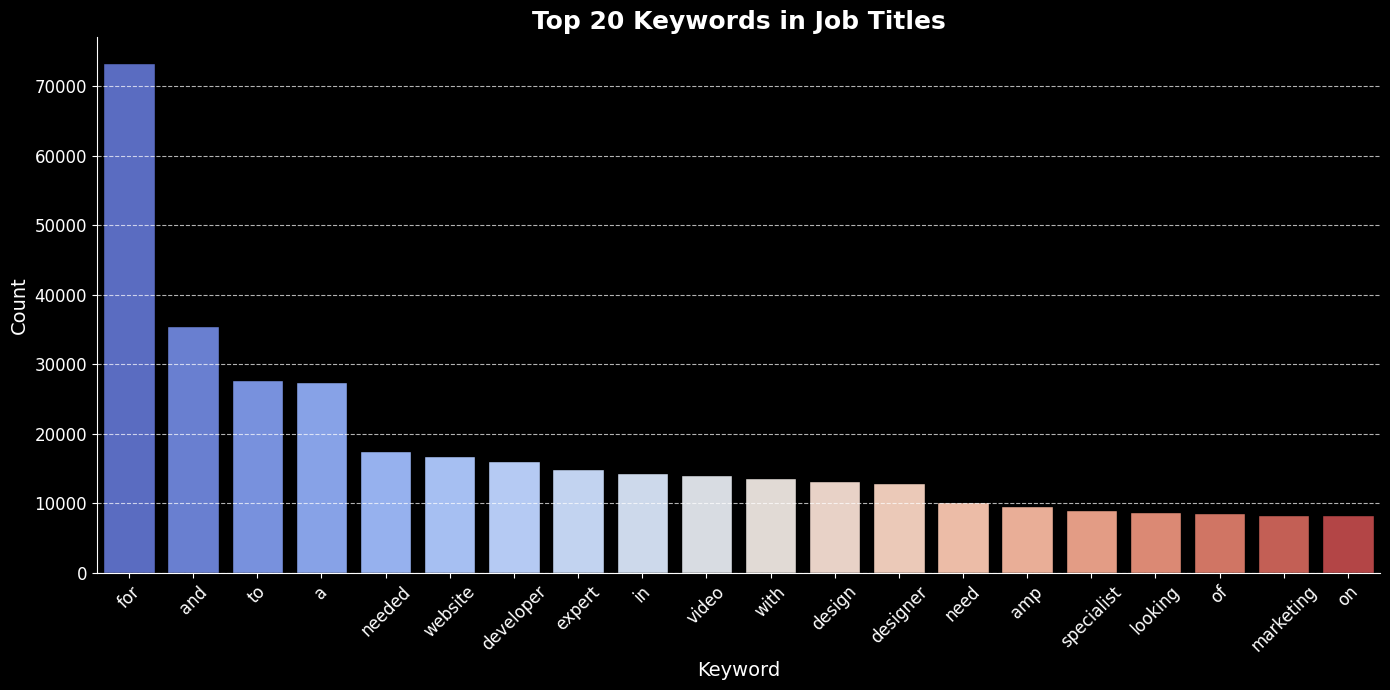

In [72]:
# Customize the plot
plt.figure(figsize=(14, 7))
sns.barplot(
    data=keywords_df,
    x='Keyword',
    y='Count',
    palette='coolwarm',
    edgecolor='black'
)
plt.title('Top 20 Keywords in Job Titles', fontsize=18, fontweight='bold')
plt.xlabel('Keyword', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.tight_layout()
plt.show()

#Bar chart titled "Top 20 Keywords in Job Titles."

#Overall Trend:

* The chart displays the frequency of the top 20 keywords that appear in job titles.
* There is a significant drop in frequency from the top-ranking keywords to the lower-ranking ones.
#Specific Observations:

* "for" is the most frequent keyword, appearing significantly more often than any other keyword.
* "to" and "and" are the next most frequent keywords, suggesting that these are common conjunctions used in job titles.
* "needed", "website", "developer", "expert", and "in" are also relatively frequent keywords.
The frequency of keywords decreases rapidly towards the end of the chart.

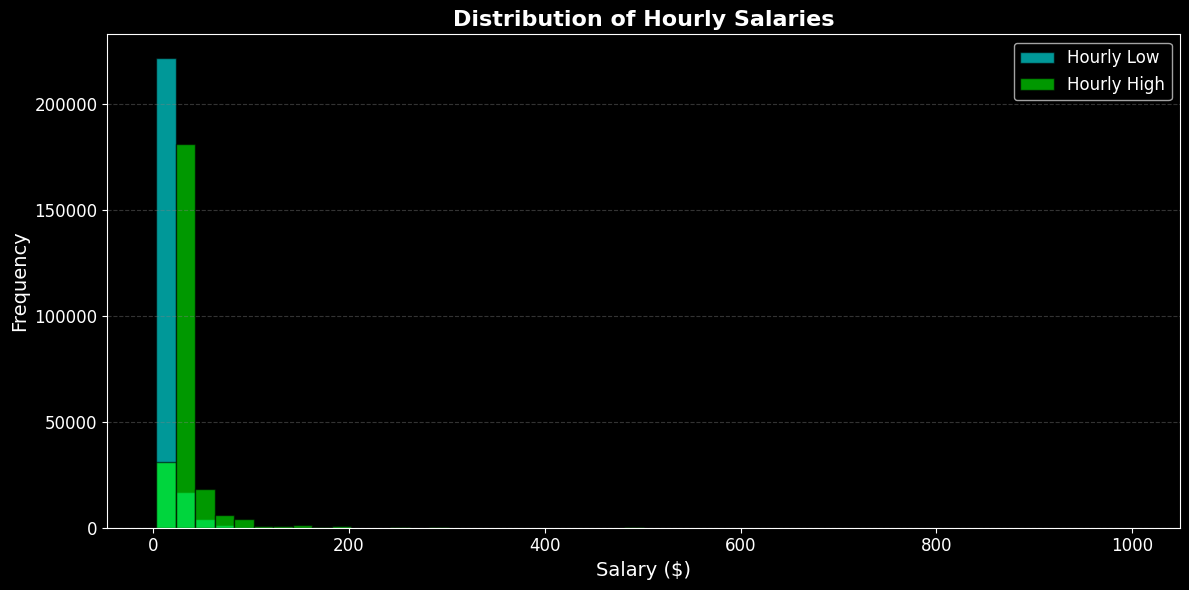

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a dark theme
plt.style.use('dark_background')

# Plot the distribution
plt.figure(figsize=(12, 6))
data['hourlylow'].dropna().plot(
    kind='hist', bins=50, color='cyan', alpha=0.6, label='Hourly Low', edgecolor='black'
)
data['hourlyhigh'].dropna().plot(
    kind='hist', bins=50, color='lime', alpha=0.6, label='Hourly High', edgecolor='black'
)

# Add titles and labels
plt.title('Distribution of Hourly Salaries', fontsize=16, fontweight='bold', color='white')
plt.xlabel('Salary ($)', fontsize=14, color='white')
plt.ylabel('Frequency', fontsize=14, color='white')

# Customize ticks and grid
plt.xticks(color='white', fontsize=12)
plt.yticks(color='white', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4, color='gray')

# Add legend
plt.legend(facecolor='black', fontsize=12)

plt.tight_layout()
plt.show()

#histogram titled "Distribution of Hourly Salaries."

# Overall Trend:

* The histogram shows the distribution of hourly salaries for two categories: "Hourly Low" and "Hourly High."
* Both distributions are skewed to the right, meaning there are more observations with lower salaries compared to higher salaries.
# Specific Observations:

* Hourly Low: This distribution has a higher frequency of salaries in the lower range (below $100), with a rapid decrease in frequency as the salary increases.
* Hourly High: This distribution has a lower frequency in the lower range compared to "Hourly Low" and extends further to the right, indicating a higher proportion of salaries above $100. The frequency also decreases as the salary increases, but at a slower rate than "Hourly Low."

<Figure size 2200x1000 with 0 Axes>

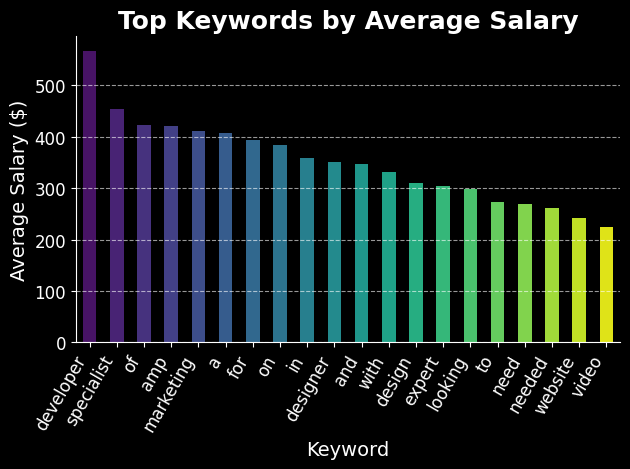

In [74]:
# Ensure no missing values
keywords_salary_df = keywords_salary_df.dropna()

# Custom color palette
colors = sns.color_palette('viridis', n_colors=20)

# Plot the data
plt.figure(figsize=(22, 10))
keywords_salary_df.head(20).plot(
    kind='bar',
    x='Keyword',
    y='Average Salary',
    legend=False,
    color=colors
)

# Add titles and labels
plt.title('Top Keywords by Average Salary', fontsize=18, fontweight='bold')
plt.xlabel('Keyword', fontsize=14)
plt.ylabel('Average Salary ($)', fontsize=14)

# Rotate X-axis labels for readability
plt.xticks(rotation=60, ha='right', fontsize=12)

plt.yticks(fontsize=12)

# Add gridlines for clarity
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Remove plot spines for a clean look
sns.despine()

plt.tight_layout()

plt.show()

#"Top Keywords by Average Salary."

#Overall Trend:

* The chart shows the average salary associated with different keywords found in job titles.
There is a wide range of average salaries across the different keywords.
# Specific Observations:

* "Developer" has the highest average salary, significantly surpassing all other keywords.
* "Specialist" and "of" have the next highest average salaries.
* "Marketing" and "amp" show a moderate average salary.
* The remaining keywords have relatively lower average salaries.

In [75]:
# Define a function to analyze salaries based on keywords
def keyword_salary_analysis(data, keywords):
    # Create a DataFrame to store results
    keyword_data = []

    # Iterate over each keyword
    for keyword in keywords:
        # Filter data based on the keyword in the title
        filtered_data = data.loc[
            data['title'].str.contains(keyword, case=False, na=False)
        ]

        # Calculate average hourly low and high salaries
        avg_low = filtered_data['hourlylow'].mean()
        avg_high = filtered_data['hourlyhigh'].mean()

        # Append results to the list
        keyword_data.append({
            'Keyword': keyword,
            'Avg Hourly Low': avg_low,
            'Avg Hourly High': avg_high
        })

    # Convert to a DataFrame
    return pd.DataFrame(keyword_data)

keywords = ['developer', 'specialist', 'designer', 'manager', 'assistant']
keyword_salary_df = keyword_salary_analysis(data, keywords)

print(keyword_salary_df)

      Keyword  Avg Hourly Low  Avg Hourly High
0   developer       18.207101        41.079651
1  specialist       16.136346        39.511008
2    designer       17.281787        40.520429
3     manager       14.953614        37.315402
4   assistant       11.650822        28.226830


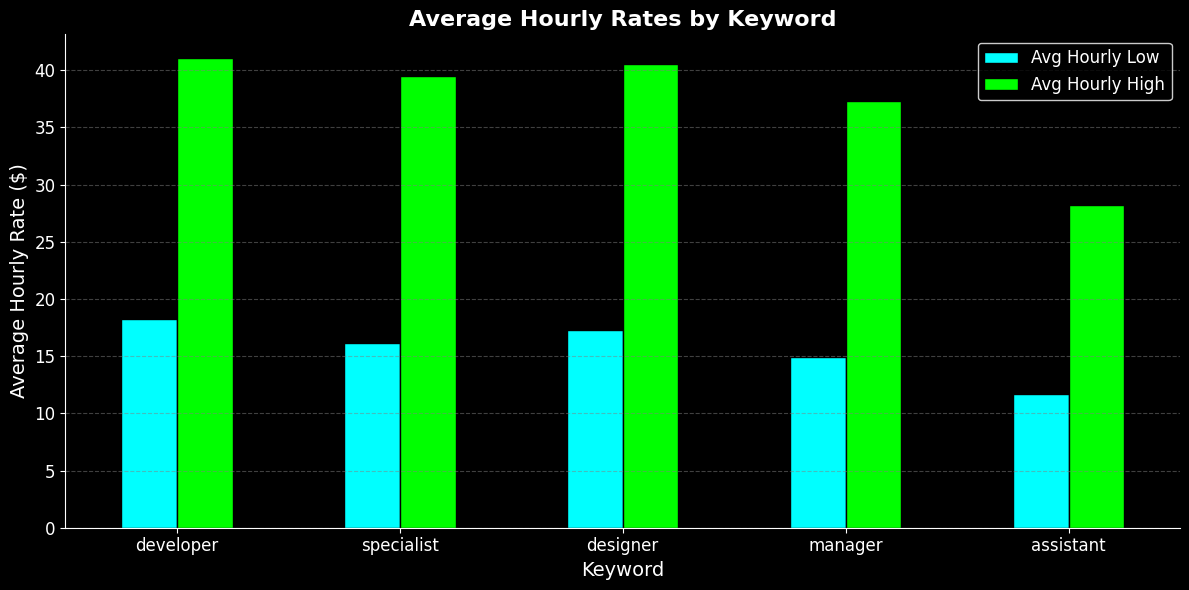

In [76]:
# Set a dark theme
plt.style.use('dark_background')

# Plot the bar chart
ax = keyword_salary_df.plot(
    x='Keyword',
    y=['Avg Hourly Low', 'Avg Hourly High'],
    kind='bar',
    figsize=(12, 6),
    color=['cyan', 'lime'],
    edgecolor='black'
)

# Add titles and labels
plt.title('Average Hourly Rates by Keyword', fontsize=16, fontweight='bold', color='white')
plt.xlabel('Keyword', fontsize=14, color='white')
plt.ylabel('Average Hourly Rate ($)', fontsize=14, color='white')

# Customize ticks
plt.xticks(rotation=0, fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')

# Customize legend
plt.legend(['Avg Hourly Low', 'Avg Hourly High'], fontsize=12, facecolor='black', edgecolor='white')

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.5, color='gray')

sns.despine()

plt.tight_layout()
plt.show()

#"Average Hourly Rates by Keyword."

#Overall Trend:

* The chart compares the average hourly rates for two categories ("Avg Hourly Low" and "Avg Hourly High") across different keywords.
8 The average hourly rates vary significantly between the keywords and between the two categories.
# Specific Observations:

* "Developer": This keyword has the highest average hourly rate in both categories, with "Avg Hourly High" being significantly higher than "Avg Hourly Low."
* "Specialist": This keyword also shows a high average hourly rate, especially in the "Avg Hourly High" category.
* "Designer": This keyword has a moderate average hourly rate in both categories, with a noticeable difference between the two.
* "Manager" and "Assistant": These keywords have lower average hourly rates compared to the other keywords.

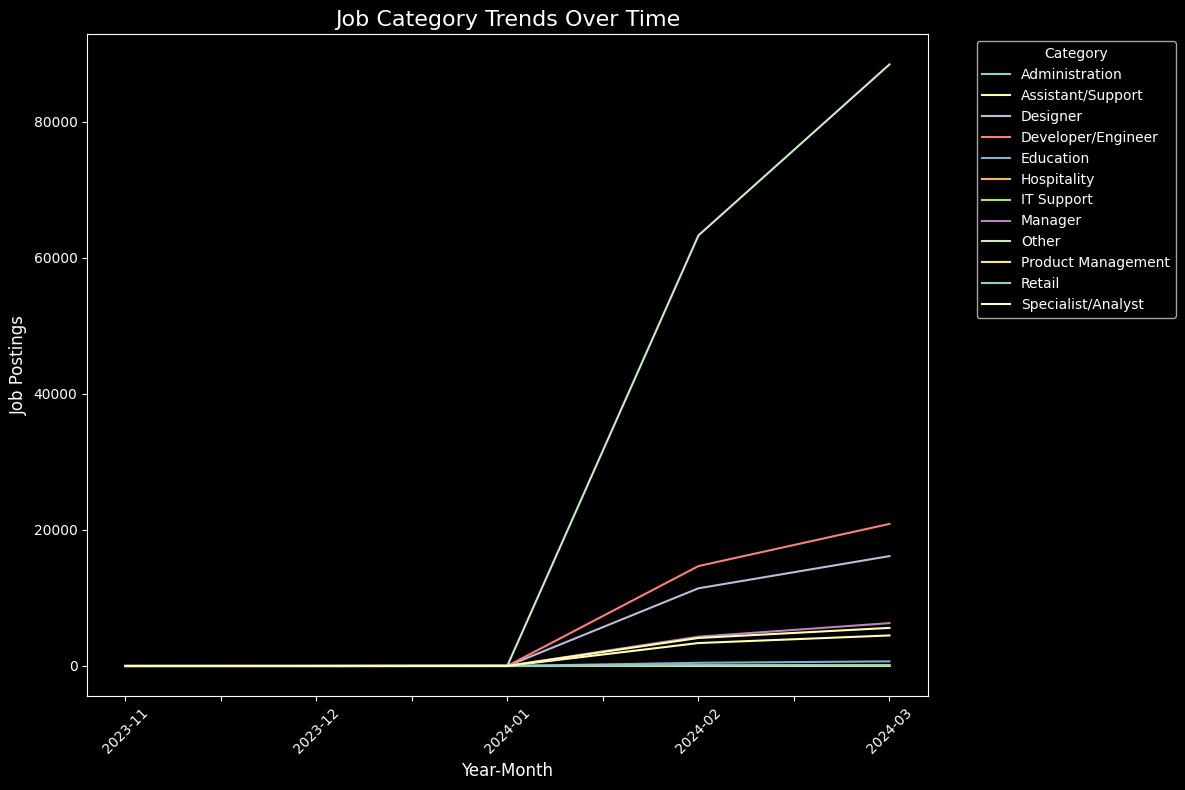

In [77]:
# Convert 'published_date' to datetime and create 'year_month' column
data['publisheddate'] = pd.to_datetime(data['publisheddate'])
data['year_month'] = data['publisheddate'].dt.to_period('M').astype(str)

# Category inference function
def infer_category(title):
    title = str(title).lower()
    categories = {
        'Developer/Engineer': ['developer', 'engineer', 'programmer', 'coder', 'website'],
        'Designer': ['web design', 'designer', 'ui', 'ux', 'graphic'],
        'Manager': ['manager', 'lead', 'supervisor'],
        'Specialist/Analyst': ['specialist', 'consultant', 'analyst'],
        'Assistant/Support': ['assistant', 'coordinator', 'support'],
        'Retail': ['retail', 'store manager', 'cashier', 'sales associate', 'merchandiser'],
        'Hospitality': ['hospitality', 'hotel manager', 'chef', 'cook', 'event planner'],
        'Administration': ['administrative assistant', 'office manager', 'executive assistant', 'receptionist'],
        'Product Management': ['product manager', 'product owner', 'product development', 'product strategist'],
        'IT Support': ['IT support', 'help desk', 'technical support', 'IT technician', 'IT specialist'],
        'Education': ['teacher', 'educator', 'instructor', 'professor', 'tutor']
    }
    for category, keywords in categories.items():
        if any(keyword in title for keyword in keywords):
            return category
    return 'Other'

# Apply category function to 'title' column
data['category'] = data['title'].apply(infer_category)

# Group and pivot data for plotting
category_trends = data.groupby(['year_month', 'category']).size().reset_index(name='job_postings')
category_trends_pivot = category_trends.pivot(index='year_month', columns='category', values='job_postings').fillna(0)

# Plot trends
plt.figure(figsize=(12, 8))
category_trends_pivot.plot(ax=plt.gca())
plt.title('Job Category Trends Over Time', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Job Postings', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#line graph titled "Job Category Trends Over Time."

#Overall Trend:

* The graph shows a significant increase in job postings across all categories from 2023-11 to 2024-03.
# Specific Observations:

* Developer/Engineer and Specialist/Analyst categories show the most substantial growth, with a steep rise in postings from 2023-12 to 2024-03.
Manager and Assistant/Support categories also exhibit a notable increase in postings during the same period.
* Administration, Hospitality, Retail, and Education categories show a slower growth rate compared to the others.
* IT Support and Other categories have the lowest number of postings throughout the period.

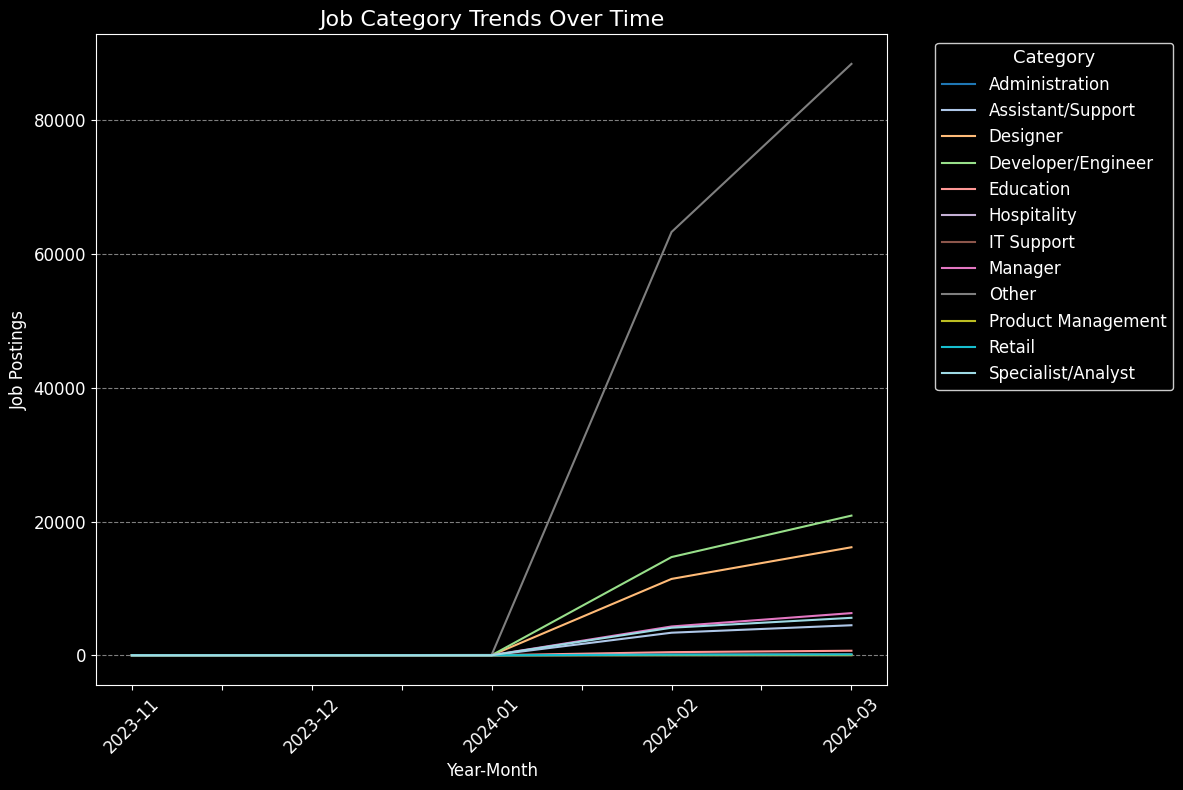

In [78]:
# Set a dark background style
plt.style.use('dark_background')

# Convert 'published_date' to datetime and create 'year_month' column
data['publisheddate'] = pd.to_datetime(data['publisheddate'])
data['year_month'] = data['publisheddate'].dt.to_period('M').astype(str)

# Category inference function
def infer_category(title):
    title = str(title).lower()
    categories = {
        'Developer/Engineer': ['developer', 'engineer', 'programmer', 'coder', 'website'],
        'Designer': ['web design', 'designer', 'ui', 'ux', 'graphic'],
        'Manager': ['manager', 'lead', 'supervisor'],
        'Specialist/Analyst': ['specialist', 'consultant', 'analyst'],
        'Assistant/Support': ['assistant', 'coordinator', 'support'],
        'Retail': ['retail', 'store manager', 'cashier', 'sales associate', 'merchandiser'],
        'Hospitality': ['hospitality', 'hotel manager', 'chef', 'cook', 'event planner'],
        'Administration': ['administrative assistant', 'office manager', 'executive assistant', 'receptionist'],
        'Product Management': ['product manager', 'product owner', 'product development', 'product strategist'],
        'IT Support': ['IT support', 'help desk', 'technical support', 'IT technician', 'IT specialist'],
        'Education': ['teacher', 'educator', 'instructor', 'professor', 'tutor']
    }
    for category, keywords in categories.items():
        if any(keyword in title for keyword in keywords):
            return category
    return 'Other'

# Apply category function to 'title' column
data['category'] = data['title'].apply(infer_category)

# Group and pivot data for plotting
category_trends = data.groupby(['year_month', 'category']).size().reset_index(name='job_postings')
category_trends_pivot = category_trends.pivot(index='year_month', columns='category', values='job_postings').fillna(0)

# Plot trends
plt.figure(figsize=(12, 8))

# Use the dark theme colors for the plot
category_trends_pivot.plot(ax=plt.gca(), colormap='tab20')  # 'tab20' for a vibrant set of colors

# Add titles and labels
plt.title('Job Category Trends Over Time', fontsize=16, color='white')
plt.xlabel('Year-Month', fontsize=12, color='white')
plt.ylabel('Job Postings', fontsize=12, color='white')

# Customize ticks
plt.xticks(rotation=45, fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')

# Adjust legend
plt.legend(title='Category', fontsize=12, title_fontsize='13', loc='upper left', bbox_to_anchor=(1.05, 1), facecolor='black', edgecolor='white')

# Add gridlines and layout adjustments
plt.grid(axis='y', linestyle='--', alpha=0.5, color='white')
plt.tight_layout()
plt.show()


#line graph titled "Job Category Trends Over Time."

#Overall Trend:

* The graph shows a significant increase in job postings across all categories from 2023-11 to 2024-03.
# Specific Observations:

* Developer/Engineer and Specialist/Analyst categories show the most substantial growth, with a steep rise in postings from 2023-12 to 2024-03.
Manager and Assistant/Support categories also exhibit a notable increase in postings during the same period.
* Administration, Hospitality, Retail, and Education categories show a slower growth rate compared to the others.
* IT Support and Other categories have the lowest number of postings throughout the period.

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from collections import Counter

# Extract titles from 'Other' category and vectorize with TF-IDF
other_titles = data[data['category'] == 'Other']['title'].dropna()
tfidf_matrix = TfidfVectorizer(stop_words='english', max_features=500).fit_transform(other_titles)

# Apply K-Means clustering
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(tfidf_matrix)

# Assign clusters to 'subcategory'
data.loc[data['category'] == 'Other', 'subcategory'] = clusters

# Analyze and display cluster keywords
cluster_keywords = {i: [word for word, _ in Counter(' '.join(other_titles[clusters == i]).split()).most_common(10)] for i in range(num_clusters)}

# Print cluster insights
for cluster, keywords in cluster_keywords.items():
    print(f"Cluster {cluster}: {', '.join(keywords)}")

Cluster 0: Expert, for, expert, and, Needed, to, Google, a, Ads, -
Cluster 1: for, and, to, a, -, in, of, with, Design, on
Cluster 2: for, a, Create, Looking, to, and, Help, with, help, in
Cluster 3: Video, Editor, for, video, YouTube, editor, a, and, Youtube, Channel
Cluster 4: Marketing, for, marketing, and, Digital, Social, Expert, Email, Media, a


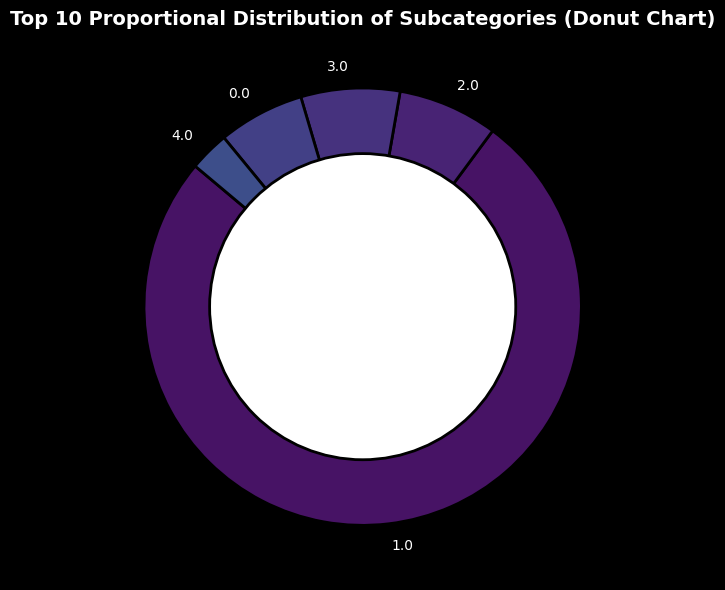

In [80]:
# Count the frequency of each subcategory and select the top 10
subcategory_counts = data['subcategory'].value_counts().head(10)

# Plot donut chart with style
plt.figure(figsize=(6, 6))
plt.pie(subcategory_counts,
        labels=subcategory_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 2, 'linestyle': 'solid', 'width': 0.4})

# Add a circle in the middle to create the donut effect
centre_circle = plt.Circle((0,0), 0.70, fc='white', edgecolor='black', linewidth=2)
plt.gca().add_artist(centre_circle)

plt.title('Top 10 Proportional Distribution of Subcategories (Donut Chart)', fontsize=14, weight='bold', color='white')
plt.tight_layout()
plt.show()

#Donut chart titled "Top 10 Proportional Distribution of Subcategories":

#Overall Trend:

* The chart displays the proportion of each subcategory within a larger category.
The majority of the distribution is concentrated in one subcategory.
#Specific Observations:

* Subcategory 4.0 holds the largest proportion, accounting for a significant majority of the total.
* Subcategory 3.0 has the second-largest proportion.
* Subcategories 2.0, 1.0, and 0.0 have smaller proportions.

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 2.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzv1ooru8/a_vxmzxn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzv1ooru8/10ppo690.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24670', 'data', 'file=/tmp/tmpzv1ooru8/a_vxmzxn.json', 'init=/tmp/tmpzv1ooru8/10ppo690.json', 'output', 'file=/tmp/tmpzv1ooru8/prophet_modelsswo0ffr/prophet_model-20250119113815.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:38:15 - cmdstanpy - INFO - Chain [1] start processing
IN

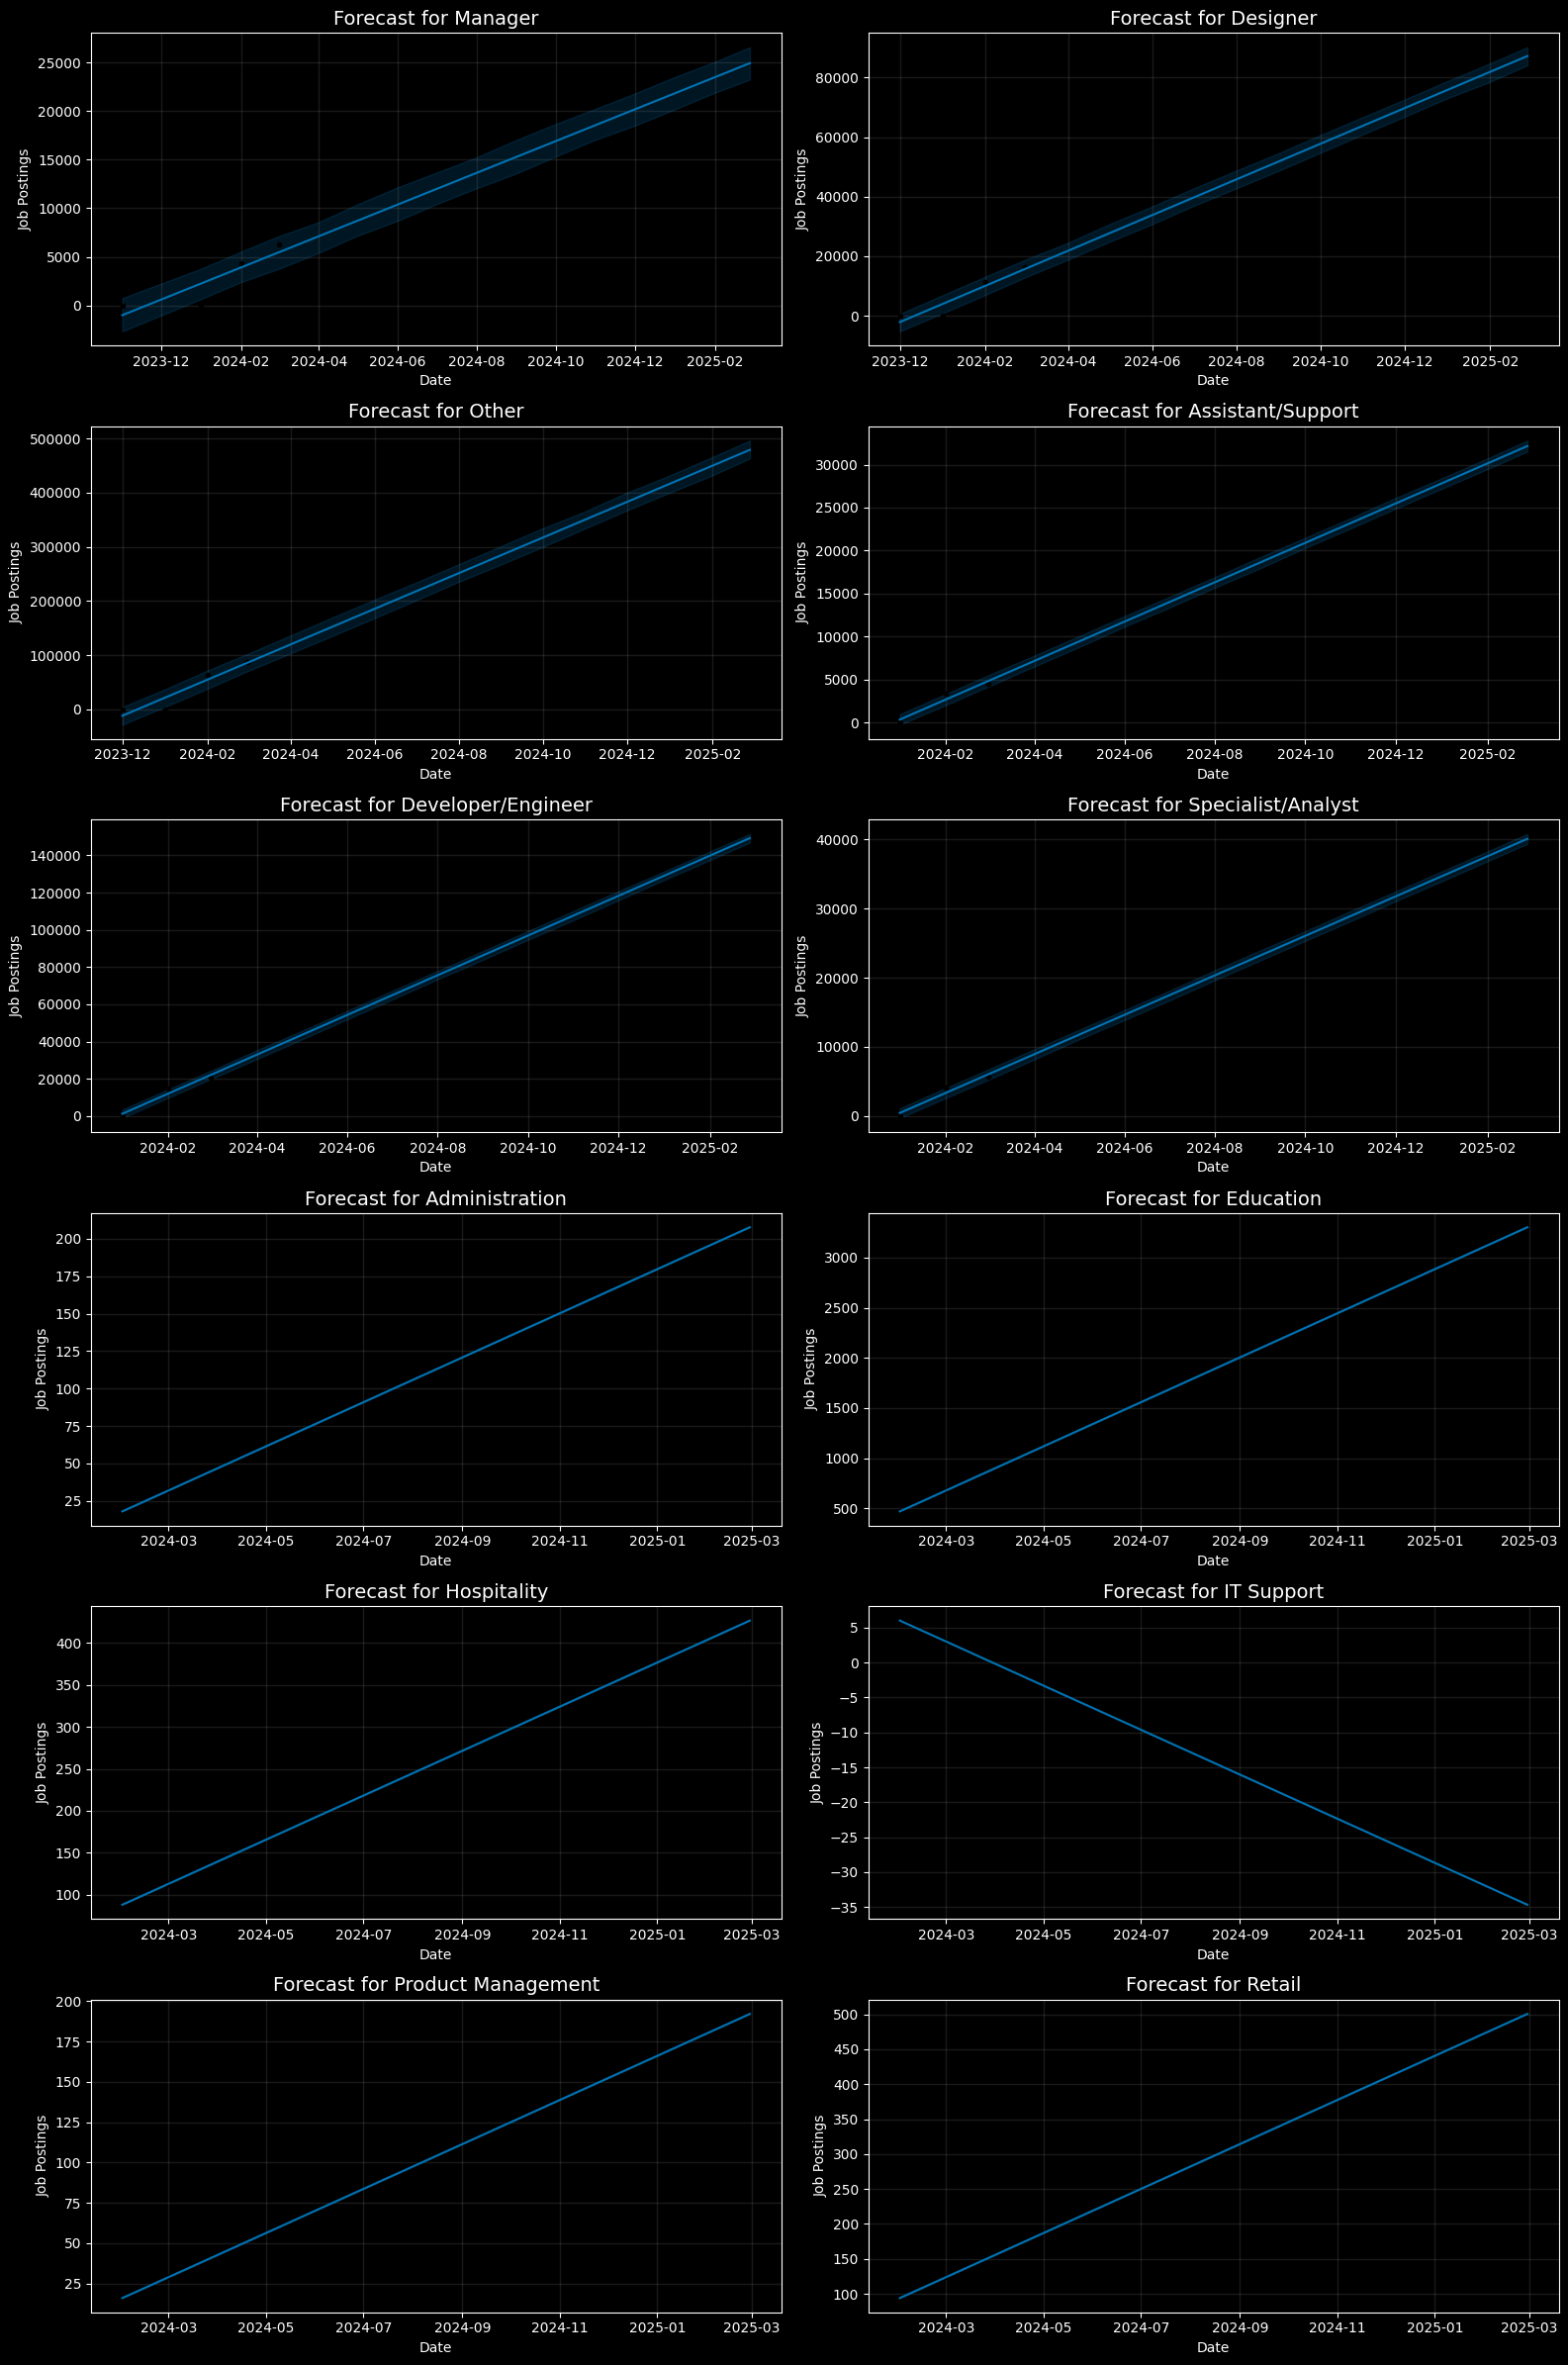

In [81]:
from prophet import Prophet

#  Prepare the data
data['publisheddate'] = pd.to_datetime(data['publisheddate'])
data['year_month'] = data['publisheddate'].dt.to_period('M').astype(str)

# Aggregate job postings by 'year_month' and 'category'
category_trends = data.groupby(['year_month', 'category']).size().reset_index(name='job_postings')

# Create subplots for each category
categories = category_trends['category'].unique()
n_categories = len(categories)

# Set up subplots
fig, axes = plt.subplots(nrows=(n_categories // 2) + (n_categories % 2), ncols=2, figsize=(16, 4 * (n_categories // 2)))
axes = axes.flatten()

# Loop through each category
for i, category in enumerate(categories):
    category_data = category_trends[category_trends['category'] == category]
    category_data = category_data.rename(columns={'year_month': 'ds', 'job_postings': 'y'})
    category_data['ds'] = pd.to_datetime(category_data['ds'])

    # Fit Prophet model and forecast
    model = Prophet()
    model.fit(category_data)
    future = model.make_future_dataframe(periods=12, freq='M')
    forecast = model.predict(future)

    # Plot forecast
    model.plot(forecast, ax=axes[i], xlabel='Date', ylabel='Job Postings')
    axes[i].set_title(f'Forecast for {category}', fontsize=14)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

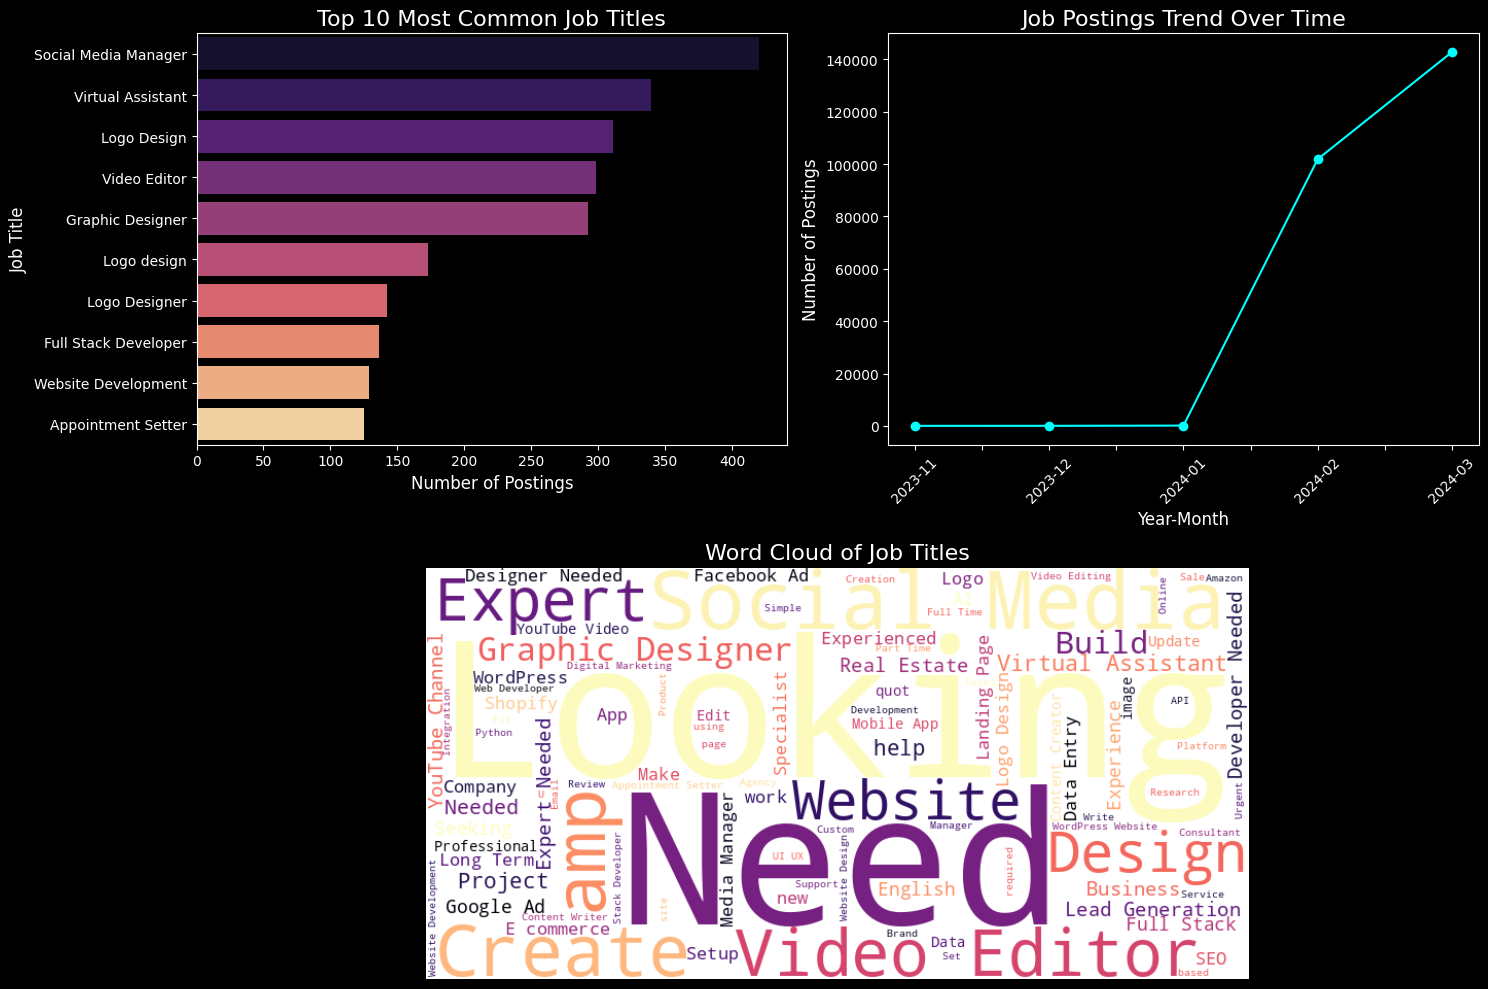

In [82]:
from wordcloud import WordCloud
# Top 10 most common job titles
top_titles = data['title'].value_counts().head(10)

# Trend of job postings over time (monthly)
monthly_trends = data['year_month'].value_counts().sort_index()

# Word cloud of job titles to visualize common roles
text = " ".join(title for title in data['title'])

# Set dark background
plt.style.use('dark_background')

plt.figure(figsize=(15, 10))

# Top 10 job titles
plt.subplot(2, 2, 1)
sns.barplot(y=top_titles.index, x=top_titles.values, palette='magma')  # Dark color palette
plt.title('Top 10 Most Common Job Titles', fontsize=16, color='white')
plt.xlabel('Number of Postings', fontsize=12, color='white')
plt.ylabel('Job Title', fontsize=12, color='white')

# Monthly trend of job postings
plt.subplot(2, 2, 2)
monthly_trends.plot(kind='line', marker='o', color='cyan')
plt.title('Job Postings Trend Over Time', fontsize=16, color='white')
plt.xlabel('Year-Month', fontsize=12, color='white')
plt.ylabel('Number of Postings', fontsize=12, color='white')
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')

# Word cloud of job titles
plt.subplot(2, 1, 2)
wordcloud = WordCloud(background_color='White', width=800, height=400, max_words=100, colormap='magma').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Job Titles', fontsize=16, color='white')

plt.tight_layout()
plt.show()

#Top 10 Most Common Job Titles

* Social Media Manager is the most frequent job title, followed closely by Virtual Assistant.
Logo Designer appears three times in the top 10, indicating its popularity.
Other common titles include Video Editor, Graphic Designer, and Full Stack Developer.
Job Postings Trend Over Time

* There is a significant increase in job postings from 2023-11 to 2024-03.
The number of postings seems to plateau at a high level in 2024-03.
# Word Cloud of Job Titles

* The word cloud visually represents the frequency of words in the job titles.
Prominent words include "Social Media," "Graphic Designer," "Video Editor," "Virtual Assistant," "Need," and "Website."
This reinforces the findings from the "Top 10 Most Common Job Titles" chart.
# Overall Insights

* The data suggests a high demand for professionals in areas like social media management, virtual assistance, graphic design, and web development.
* The increasing trend in job postings indicates a growing job market in these areas.
* The word cloud provides a visual summary of the most common keywords used in job titles, highlighting the importance of skills like graphic design, video editing, and social media management.

In [83]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Feature extraction
data['year'] = data['publisheddate'].dt.year
data['month'] = data['publisheddate'].dt.month
data['day'] = data['publisheddate'].dt.day

#  Define features and target variable
features = ['ishourly', 'hourlylow', 'hourlyhigh', 'year', 'month', 'day', 'country']
target = 'budget'

# Prepare features and target
X = data[features]
y = data[target]

#  One-hot encoding of categorical variables
categorical_features = ['country']
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)],
    remainder='passthrough'
)

#  Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Build and train the model pipeline
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

model_pipeline.fit(X_train, y_train)

#  Make predictions and evaluate the model
y_pred = model_pipeline.predict(X_test)

#  Compute performance metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output results
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

RMSE: 10636.176413487861
MAE: 624.7015293323884
R²: -0.034538467327751565


In [84]:
# Define an error threshold
threshold = 0.1  # 10% threshold for accuracy

# Calculate accuracy based on threshold
accuracy = np.mean(np.abs(y_test - y_pred) <= threshold * y_test) * 100

# Print the regression accuracy
print(f"Regression Accuracy: {accuracy:.2f}%")

Regression Accuracy: 58.47%


In [85]:
import pickle

# Save the DataFrame to a pickle file
with open('filtered_jobs.pkl', 'wb') as file:
    pickle.dump(data, file)

print("Data saved as pickle file 'filtered_jobs.pkl'")

Data saved as pickle file 'filtered_jobs.pkl'


In [86]:
# Load the pickle file
with open('filtered_jobs.pkl', 'rb') as file:
    loaded_data = pickle.load(file)

print("Data loaded from pickle file")

Data loaded from pickle file


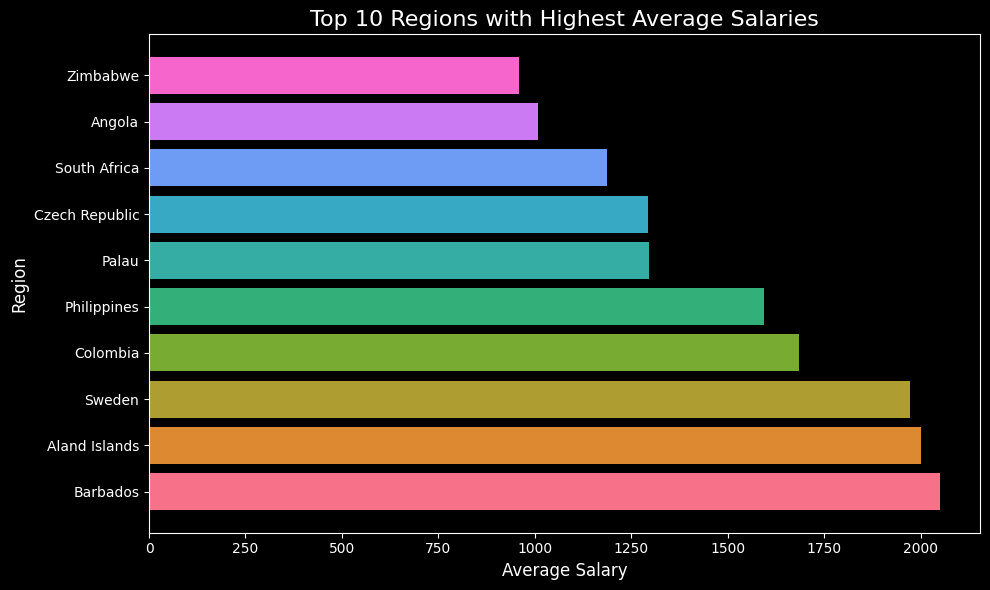

In [87]:
# Calculate average salary (hourly or fixed)
data['average_salary'] = data.apply(
    lambda row: (row['hourlylow'] + row['hourlyhigh']) / 2 if row['ishourly'] == 1 else row['budget'],
    axis=1
)

# Group by country and calculate mean average salary, then sort by salary
region_salary = data.groupby('country')['average_salary'].mean().sort_values(ascending=False).reset_index()

# Get the top 10 highest salaries
top_10_region_salary = region_salary.head(10)

# Plotting the comparative salary analysis for top 10 regions
colors = sns.color_palette("husl", len(top_10_region_salary))

plt.figure(figsize=(10, 6))
plt.barh(top_10_region_salary['country'], top_10_region_salary['average_salary'], color=colors)
plt.title('Top 10 Regions with Highest Average Salaries', fontsize=16)
plt.xlabel('Average Salary', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.tight_layout()
plt.show()

# Horizontal bar chart titled "Top 10 Regions with Highest Average Salaries."

# Overall Trend:

* The chart displays the average salaries for the top 10 regions, revealing a wide range of values.
Specific Observations:

* Barbados has the highest average salary, significantly surpassing all other regions.
Aland Islands comes in second with a high average salary.
* Sweden and Colombia also have relatively high average salaries.
Zimbabwe, Angola, and South Africa have lower average salaries compared to the top-ranking regions.

In [88]:
data.head()

,title,link,publisheddate,ishourly,hourlylow,hourlyhigh,budget,country,Remote_Work,Average_hourly_rate,year,month,day_of_week,day,is_even_day,job_category,year_month,category,subcategory,average_salary
60380,Thanks for jobs,https://www.upwork.com/jobs/Thanks-for-jobs_%7...,2024-02-22 21:03:29+00:00,0,17.339644,41.97061,1000000.0,Bangladesh,On-site,29.655127,2024,2,3,22,1,Other,2024-02,Other,1.0,1000000.0
2061,Freelance Accountant for Legal Documentation,https://www.upwork.com/jobs/Freelance-Accounta...,2024-02-19 02:03:29+00:00,0,17.339644,41.97061,1000000.0,Philippines,On-site,29.655127,2024,2,0,19,0,Other,2024-02,Other,1.0,1000000.0
225755,Market development,https://www.upwork.com/jobs/Market-development...,2024-03-17 17:24:50+00:00,0,17.339644,41.97061,1000000.0,Canada,On-site,29.655127,2024,3,6,17,0,Other,2024-03,Other,1.0,1000000.0
42712,Upwork Professional Job Removal,https://www.upwork.com/jobs/Upwork-Professiona...,2024-02-20 23:06:40+00:00,0,17.339644,41.97061,1000000.0,United Kingdom,On-site,29.655127,2024,2,1,20,1,Other,2024-02,Other,1.0,1000000.0
171199,⚠️ Mail Copywriter,https://www.upwork.com/jobs/Mail-Copywriter_%7...,2024-03-09 19:41:59+00:00,0,17.339644,41.97061,1000000.0,Spain,On-site,29.655127,2024,3,5,9,0,Other,2024-03,Other,1.0,1000000.0


In [89]:
import plotly.express as px

# Group by country and calculate average salary
country_salary_data = data.groupby('country', as_index=False)['average_salary'].mean()

# Creating interactive choropleth map
fig_map = px.choropleth(
    country_salary_data,
    locations="country",
    locationmode="country names",
    color="average_salary",
    hover_name="country",
    title="Interactive Salary Trends by Country",
    color_continuous_scale=px.colors.sequential.Viridis
)

# Update layout to customize background color and other styles
fig_map.update_layout(
    geo=dict(
        lakecolor='rgb(255, 255, 255)',
        projection_type='natural earth',
    ),
    title_font=dict(size=20, color="black", family="Arial"),
    coloraxis_colorbar_title="Average Salary",
    plot_bgcolor="rgb(243, 243, 243)",
    paper_bgcolor="rgb(255, 255, 255)"
)

# Show the figure
fig_map.show()

In [90]:
import plotly.express as px

# Group by country and calculate average salary
country_salary_data = data.groupby('country', as_index=False)['average_salary'].mean()

# Creating an interactive choropleth map with a darker background
fig_map = px.choropleth(
    country_salary_data,
    locations="country",
    locationmode="country names",
    color="average_salary",
    hover_name="country",
    title="Interactive Salary Trends by Country",
    color_continuous_scale=px.colors.sequential.Inferno  # Darker color scale for the map
)

# Update layout to customize background color and other styles
fig_map.update_layout(
    geo=dict(
        lakecolor='rgb(25, 25, 25)',
        projection_type='mercator',
        showcoastlines=True,
        coastlinecolor="gray",
        showland=True,
        landcolor="rgb(50, 50, 50)",
    ),
    title_font=dict(size=20, color="white", family="Arial"),
    coloraxis_colorbar_title="Average Salary",
    plot_bgcolor="rgb(40, 40, 40)",
    paper_bgcolor="rgb(30, 30, 30)"
)

# Show the figure
fig_map.show()

In [91]:
# Save the updated dataset
data.to_csv('updated_data.csv', index=False)

In [92]:
# from google colab import files
from google.colab import files

# Download the file
files.download('updated_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>